# Synapse polyadicity in the *Megaphragma* lamina
- R1-6, L2, and AC consistenly form presynaptic terminals in every lamina cartridge
- How many postsynaptic partners does each terminals contact on average?
- Does average multiplicity/polyadicity vary among cell-types?
- Is there a characteristic set of post-synaptic partners that is common among a cell's terminals?  

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os.path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu
import statsmodels.api as sm

import sys
sys.path.extend('.', '..')
from cx_analysis.dataframe_tools import extract_connector_table
from cx_analysis.cartridge_metadata import ret_clusters
from vis.fig_tools import subtype_cm
#from vis.hex_lattice import hexplot

# import matplotlib as mpl
# import matplotlib.gridspec as gridspec
# from matplotlib.lines import Line2D

In [3]:
plt.rcdefaults()
plt.style.use('vis/lamina.mplstyle')

st_cm = subtype_cm()

save_figs = False

In [4]:
# Each row is a pre->post link
tp = '200914'
data_path = f'~/Data/{tp}_lamina/{tp}_linkdf.pickle'
df = pd.read_pickle(data_path)
subtypes = np.unique(df['post_type'])  # R1-6 are [R1R4, R2R5, ...]
ommatidia = np.unique(df['pre_om'])
# Summarize linkdf as a table with rows for each pre-terminal
ct_df = extract_connector_table(df) # DataFrame of connectors (presyn terminals)
ct_df['post_count'] = ct_df.loc[:, subtypes].sum(axis=1)

# # Rhabdom vols from Anastasia
# rb = pd.read_csv('~/Data/lamina_additional_data/ret_cell_vol.csv').set_index('rtype').T
# rb.index.name = 'om'
# rb = rb.loc[sorted(rb.index), sorted(rb.columns)]
# rb_frac = (rb.T/rb.sum(axis=1)).T.rename(mapper={'vol': 'fvol'}, axis=1)

# rtypes = rb.columns  # R1-6 are [R1, R2, ...]


In [5]:
df

,link_id,cx_id,pre_neuron,pre_om,pre_type,pre_skel,post_neuron,post_om,post_type,post_skel
0,194220,276258,omB6_LN,B6,LMC_N,25,omB6_L1,B6,LMC_1,175606
1,175596,276258,omB6_LN,B6,LMC_N,25,omB6_L2,B6,LMC_2,44725
2,175139,276258,omB6_LN,B6,LMC_N,25,omB6_L1,B6,LMC_1,175606
3,175128,276258,omB6_LN,B6,LMC_N,25,omB6_R3,B6,R3R6,174970
4,175628,277482,omB6_LN,B6,LMC_N,25,168408,UNKNOWN,UNKNOWN,168408
...,...,...,...,...,...,...,...,...,...,...
20711,318465,479967,omC2_centri_nc,C2,centri,319210,omC2_centri_nc,C2,centri,319210
20712,318468,479967,omC2_centri_nc,C2,centri,319210,omC2_R4_nc,C2,R1R4,294885
20713,318467,479967,omC2_centri_nc,C2,centri,319210,omC2_L1_nc,C2,LMC_1,309836
20714,318466,479967,omC2_centri_nc,C2,centri,319210,omC2_R7p_nc,C2,R7p,294545


## Average polyadicity of each presynaptic cell

In [6]:
poly_df = pd.DataFrame({'pre_neuron': ct_df['pre_neuron'].unique()})

# TODO Preprocessing: get a dict with kv for each cx_id: {post_name: [node coords]}
for pre, rows in ct_df.groupby('pre_neuron'):
    ind = (poly_df['pre_neuron'] == pre)
    
    poly_df.loc[ind, 'pre_om'] = rows['pre_om'][0]
    poly_df.loc[ind, 'pre_type'] = rows['pre_type'][0]
    
    poly_df.loc[ind, 'mn_poly'] = rows['post_count'].mean(axis=0)
    poly_df.loc[ind, 'n_terms'] = len(rows)
    poly_df.loc[ind, 'n_contacts'] = rows['post_count'].sum(axis=0)

display("### Class Averages ####")
display(poly_df.groupby('pre_type').describe().T.round(decimals=1))
#display(poly_df.groupby('pre_type').std(ddof=0)) # cause df.describe() uses Series.std(ddof=1)

display("### R1-6 Overall ####")
r1_6_pairs = ['R1R4', 'R2R5', 'R3R6']
r1_6_ind = [i for i, v in poly_df['pre_type'].items() if v in r1_6_pairs]
display(poly_df.loc[r1_6_ind].describe({}).round(decimals=1))
#display(poly_df.loc[r1_6_ind].std(ddof=0)) 

print("\nNOTE: ")
print("n != 29 or 58 when the subtype is not consistently presynaptic in the lamina")

'### Class Averages ####'

pre_type          LMC_1  LMC_2  LMC_4  LMC_N   R1R4   R2R5   R3R6  R7p   R8  \
mn_poly    count   10.0   29.0    1.0   23.0   58.0   58.0   58.0  1.0  2.0   
           mean     4.2    5.7    4.0    4.5    8.0    8.3    7.9  7.0  2.5   
           std      1.5    0.8    NaN    1.5    1.4    0.8    1.3  NaN  0.7   
           min      1.7    4.6    4.0    2.5    5.0    6.3    5.4  7.0  2.0   
           25%      3.1    5.1    4.0    3.3    6.9    7.8    7.0  7.0  2.2   
           50%      4.3    5.7    4.0    4.5    8.0    8.4    7.7  7.0  2.5   
           75%      5.0    6.0    4.0    5.0    8.9    8.8    8.7  7.0  2.8   
           max      7.0    8.7    4.0    9.0   11.0   10.7   11.8  7.0  3.0   
n_terms    count   10.0   29.0    1.0   23.0   58.0   58.0   58.0  1.0  2.0   
           mean     2.2   14.9    1.0    3.0    8.9   12.6    8.9  1.0  1.0   
           std      1.4    3.2    NaN    1.9    1.4    1.5    1.7  NaN  0.0   
           min      1.0    9.0    1.0    1.0    5.0    9.0    5.0  1.0  1.0   
           25%      1.0   13.0    1.0    2.0    8.0   12.0    8.0  1.0  1.0   
           50%      2.0   14.0    1.0    2.0    9.0   12.0    9.0  1.0  1.0   
           75%      2.8   17.0    1.0    3.5   10.0   14.0   10.0  1.0  1.0   
           max      5.0   24.0    1.0    9.0   12.0   17.0   13.0  1.0  1.0   
n_contacts count   10.0   29.0    1.0   23.0   58.0   58.0   58.0  1.0  2.0   
           mean     8.8   83.2    4.0   13.5   70.7  104.0   69.5  7.0  2.5   
           std      6.4   14.7    NaN    9.3   16.9   13.1   15.6  NaN  0.7   
           min      3.0   55.0    4.0    3.0   35.0   74.0   35.0  7.0  2.0   
           25%      5.0   74.0    4.0    6.5   60.2   96.2   57.2  7.0  2.2   
           50%      6.5   85.0    4.0    9.0   69.5  104.0   69.5  7.0  2.5   
           75%     10.0   91.0    4.0   18.5   80.0  113.2   78.0  7.0  2.8   
           max     24.0  113.0    4.0   37.0  121.0  128.0  106.0  7.0  3.0   

pre_type          centri  
mn_poly    count    29.0  
           mean      4.8  
           std       0.5  
           min       3.7  
           25%       4.5  
           50%       4.7  
           75%       5.1  
           max       5.7  
n_terms    count    29.0  
           mean     27.1  
           std       6.5  
           min      10.0  
           25%      24.0  
           50%      29.0  
           75%      31.0  
           max      41.0  
n_contacts count    29.0  
           mean    128.4  
           std      30.3  
           min      56.0  
           25%     112.0  
           50%     140.0  
           75%     148.0  
           max     166.0

'### R1-6 Overall ####'

,mn_poly,n_terms,n_contacts
count,174.0,174.0,174.0
mean,8.0,10.1,81.4
std,1.2,2.4,22.1
min,5.0,5.0,35.0
50%,8.0,10.0,78.0
max,11.8,17.0,128.0



NOTE: 
n != 29 or 58 when the subtype is not consistently presynaptic in the lamina


In [7]:
ct_df

,pre_om,pre_type,pre_neuron,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,UNKNOWN,centri,post_om,post_count
100013,C6,centri,omC6_C,0,1,0,0,0,0,1,0,0,0,0,0,0,C6,2.0
100019,C6,R2R5,omC6_R2,0,3,2,0,0,0,0,0,0,0,0,0,1,C6,6.0
100028,C6,R2R5,omC6_R2,2,3,2,1,0,0,0,0,0,0,0,1,1,C6,10.0
100042,C6,R2R5,omC6_R2,2,1,1,1,0,0,0,0,0,0,0,0,1,C6,6.0
100050,C6,R2R5,omC6_R2,1,2,2,0,0,0,0,0,0,0,0,0,2,C6,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99945,C6,R2R5,omC6_R2,2,2,1,0,0,0,0,0,0,0,0,0,0,C6,5.0
99953,C6,R2R5,omC6_R2,1,4,2,1,0,0,0,0,0,2,0,0,1,multi,11.0
99964,C6,R2R5,omC6_R2,1,3,1,0,0,0,0,0,0,0,0,0,0,C6,5.0
99975,C6,R2R5,omC6_R2,1,3,2,0,0,0,0,0,0,0,0,1,1,C6,8.0


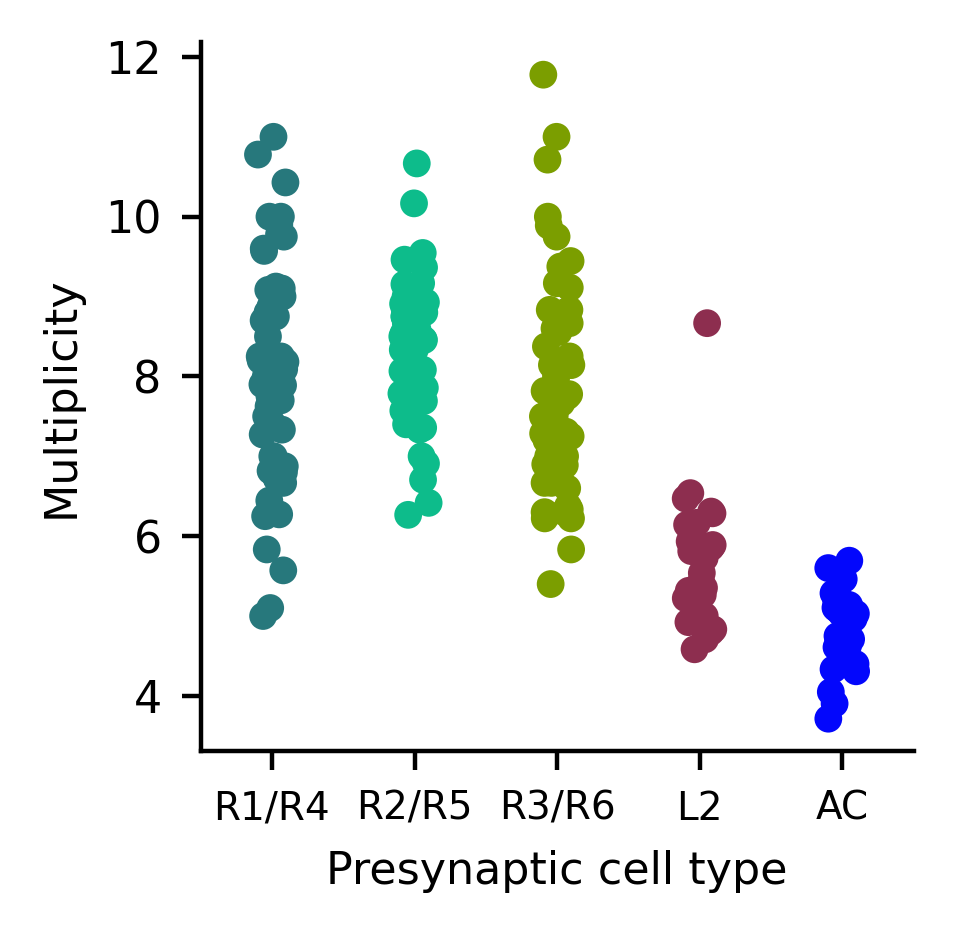

In [8]:
pretypes = ['R1R4', 'R2R5', 'R3R6', 'LMC_2', 'centri']

data = poly_df.loc[[i for i, p in poly_df['pre_type'].items() if p in pretypes]]

fig, ax = plt.subplots(1, figsize=[2.3, 2.3])
sns.stripplot(data=data, x='pre_type', y='mn_poly', 
              hue='pre_type', palette=subtype_cm(), 
              order=pretypes, ax=ax)




ax.legend_.remove()
ax.set_xticklabels(['R1/R4', 'R2/R5', 'R3/R6', 'L2', 'AC'], fontsize=7.0)
ax.set_xlabel('Presynaptic cell type')
ax.set_ylabel('Multiplicity')

if save_figs:
    fig.savefig('/mnt/home/nchua/Dropbox/lamina_figures/pre-multi-scatter.svg')
    fig.savefig('/mnt/home/nchua/Dropbox/lamina_figures/pre-multi-scatter.png')


In [9]:
# pretypes = ['R1R4', 'R2R5', 'R3R6', 'LMC_2', 'centri']

# data = poly_df.loc[[i for i, p in poly_df['pre_type'].items() if p in pretypes]]

# fig, ax = plt.subplots(1, figsize=[2.3, 2.3])
# sns.boxplot(data=data, x='pre_type', y='mn_poly', 
#               hue='pre_type', palette=subtype_cm(), 
#               order=pretypes, ax=ax)


# ax.legend_.remove()
# ax.set_xticklabels(['R1/R4', 'R2/R5', 'R3/R6', 'L2', 'AC'], fontsize=7.0)
# ax.set_xlabel('Presynaptic cell type')
# ax.set_ylabel('Multiplicity')

# if save_figs:
#     fig.savefig('/mnt/home/nchua/Dropbox/lamina_figures/pre-multi-scatter.svg')
#     fig.savefig('/mnt/home/nchua/Dropbox/lamina_figures/pre-multi-scatter.png')


## Hypothesis: Average multiplicity is larger among R1-6 than L2 and AC
$$H_{0}: P(x_{i} > y_{j}) <= 1/2$$
- Mann-Whitney U-test. Compares two samples by their rank 

In [10]:
i = [a for a, this_type in poly_df['pre_type'].items() if this_type in ['R1R4', 'R2R5', 'R3R6']]
j = [b for b, this_type in poly_df['pre_type'].items() if this_type in ['LMC_2', 'centri']]
s, p, = mannwhitneyu(poly_df.loc[i, 'mn_poly'], 
                     poly_df.loc[j, 'mn_poly'], alternative='greater')
print("###### RESULTS ######")
print(f"Test statistic: {s}, p-value: {p: .2e}")
if p > 0.001:
    print("Fail to reject null")
else:
    print("Reject null")

###### RESULTS ######
Test statistic: 9818.5, p-value:  2.13e-27
Reject null


### Bivariate distibution (number of terminals vs average multiplicity)

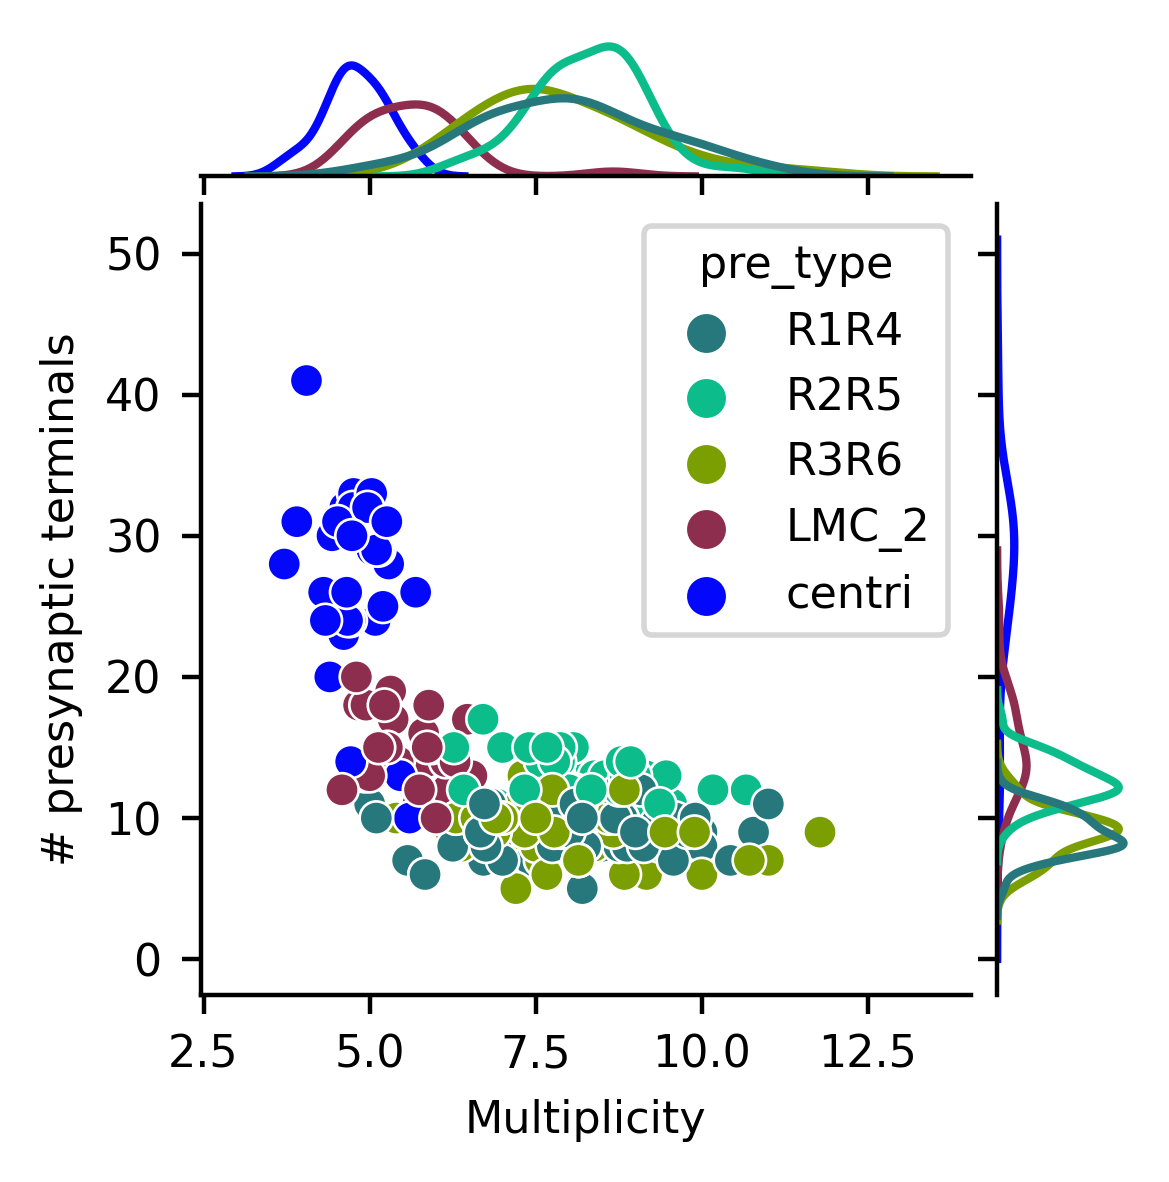

In [11]:
pretypes = ['R1R4', 'R2R5', 'R3R6', 'LMC_2', 'centri']
x_var = 'mn_poly'
y_var = 'n_terms'

labels = {'R1R4': 'R1/R4', 'R2R5': 'R2/R5', 'R3R6': 'R3/R6', 
          'LMC_2': 'L2', 'centri': 'AC'}

data = poly_df.loc[[i for i, p in poly_df['pre_type'].items() if p in pretypes]]

g = sns.JointGrid(data=data, x=x_var, y=y_var, hue='pre_type', palette=st_cm,
                  hue_order=pretypes, height=3.0)

g.plot_joint(sns.scatterplot)
ax = plt.gca()
#ax.legend([labels[pre] for pre in g.hue_order])
g.plot_marginals(sns.kdeplot)
g.set_axis_labels('Multiplicity', '# presynaptic terminals')

if save_figs:
    g.savefig('/mnt/home/nchua/Dropbox/lamina_figures/pre-joint-multi-terms.svg')
    g.savefig('/mnt/home/nchua/Dropbox/lamina_figures/pre-joint-multi-terms.png')



In [14]:
any_contact = ct_df.iloc[:, [0, 1, 2, -1]]
multi_contact = ct_df.iloc[:, [0, 1, 2, -1]]
#average_contact = ct_df.iloc[:, [0, 1, 2, -1]]

for post in subtypes:
    any_contact.loc[:, post] = ct_df[post].values > 0
    multi_contact.loc[:, post] = ct_df[post].values > 1
    #multi.loc[:, post] = ct_df[post].values > 1
display(multi_contact)
    

/mnt/home/nchua/miniconda3/envs/wasp-lite/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/mnt/home/nchua/miniconda3/envs/wasp-lite/lib/python3.8/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,pre_om,pre_type,pre_neuron,post_count,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,UNKNOWN,centri
100013,C6,centri,omC6_C,2.0,False,True,False,False,False,False,True,False,False,False,False,False,False
100019,C6,R2R5,omC6_R2,6.0,False,True,True,False,False,False,False,False,False,False,False,False,True
100028,C6,R2R5,omC6_R2,10.0,True,True,True,True,False,False,False,False,False,False,False,True,True
100042,C6,R2R5,omC6_R2,6.0,True,True,True,True,False,False,False,False,False,False,False,False,True
100050,C6,R2R5,omC6_R2,7.0,True,True,True,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99945,C6,R2R5,omC6_R2,5.0,True,True,True,False,False,False,False,False,False,False,False,False,False
99953,C6,R2R5,omC6_R2,11.0,True,True,True,True,False,False,False,False,False,True,False,False,True
99964,C6,R2R5,omC6_R2,5.0,True,True,True,False,False,False,False,False,False,False,False,False,False
99975,C6,R2R5,omC6_R2,8.0,True,True,True,False,False,False,False,False,False,False,False,True,True


In [30]:
# Probability of multi-contact for each presynaptic neuron 

data = dict()
for pre_neuron, rows in multi_contact.groupby('pre_neuron'):
    neuron_data = pd.Series(data={'pre_neuron': pre_neuron, 
                                  'pre_type': rows['pre_type'][0],
                                  'pre_om': rows['pre_om'][0]})
    
    percent = pd.Series(rows.loc[:, subtypes].sum() / float(len(rows)))
    neuron_data = neuron_data.append(percent)
    data.update({pre_neuron: neuron_data})

percent_multi = pd.DataFrame(data).T
    
display(percent_multi)

,pre_neuron,pre_type,pre_om,LMC_1,LMC_2,LMC_3,LMC_4,LMC_N,R1R4,R2R5,R3R6,R7,R7p,R8,UNKNOWN,centri
omA0_C,omA0_C,centri,A0,0.173913,0.434783,0.565217,0.0869565,0,0.130435,0.608696,0.0434783,0.217391,0.652174,0.73913,0.130435,0.0869565
omA0_L2,omA0_L2,LMC_2,A0,1,0,0.25,0.916667,0,0,0,0,0.0833333,0.5,0,0.0833333,0.5
omA0_LN,omA0_LN,LMC_N,A0,1,0,1,0,0,0,0,0,0,0,0,0.5,0.5
omA0_R1,omA0_R1,R1R4,A0,1,1,1,0.333333,0,0,0.222222,0,0,0,0,0.444444,1
omA0_R2,omA0_R2,R2R5,A0,0.8,0.933333,0.933333,0.666667,0,0,0.266667,0.0666667,0,0.2,0.0666667,0.466667,0.933333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
omE7_R2,omE7_R2,R2R5,E7,0.933333,0.933333,0.8,0.333333,0,0,0.133333,0.0666667,0.2,0.4,0,0.2,1
omE7_R3,omE7_R3,R3R6,E7,0.888889,1,0.888889,0.222222,0.111111,0,0.333333,0,0,0.111111,0,0.777778,0.555556
omE7_R4,omE7_R4,R1R4,E7,0.888889,0.777778,0.777778,0.222222,0.111111,0,0.555556,0.444444,0,0.111111,0,0.333333,0.777778
omE7_R5,omE7_R5,R2R5,E7,0.833333,1,1,0.5,0,0,0.0833333,0,0,0.0833333,0,0.416667,0.916667


'LMC_1->'

LMC_1     0.115000
LMC_2     0.638333
LMC_3     0.821667
LMC_4     0.183333
centri    0.195000
dtype: float64

LMC_1     0.184459
LMC_2     0.385865
LMC_3     0.254083
LMC_4     0.320156
centri    0.311809
dtype: float64

'LMC_2->'

LMC_1     0.870610
LMC_2     0.278686
LMC_3     0.652932
LMC_4     0.820330
centri    0.214344
dtype: float64

LMC_1     0.190068
LMC_2     0.209563
LMC_3     0.230519
LMC_4     0.205953
centri    0.206658
dtype: float64

'LMC_4->'

LMC_1     1.0
LMC_2     1.0
LMC_3     1.0
LMC_4     0.0
centri    0.0
dtype: float64

LMC_1     0.0
LMC_2     0.0
LMC_3     0.0
LMC_4     0.0
centri    0.0
dtype: float64

'LMC_N->'

LMC_1     0.849034
LMC_2     0.392133
LMC_3     0.766736
LMC_4     0.209110
centri    0.157177
dtype: float64

LMC_1     0.267293
LMC_2     0.356748
LMC_3     0.345711
LMC_4     0.336989
centri    0.213212
dtype: float64

'R1R4->'

LMC_1     0.968697
LMC_2     0.960586
LMC_3     0.733468
LMC_4     0.309175
centri    0.517851
dtype: float64

LMC_1     0.062071
LMC_2     0.076301
LMC_3     0.210355
LMC_4     0.217339
centri    0.240944
dtype: float64

'R2R5->'

LMC_1     0.894389
LMC_2     0.938602
LMC_3     0.894980
LMC_4     0.580322
centri    0.811310
dtype: float64

LMC_1     0.103114
LMC_2     0.089038
LMC_3     0.114348
LMC_4     0.219970
centri    0.174882
dtype: float64

'R3R6->'

LMC_1     0.951067
LMC_2     0.976536
LMC_3     0.755545
LMC_4     0.361018
centri    0.478415
dtype: float64

LMC_1     0.081502
LMC_2     0.054381
LMC_3     0.217640
LMC_4     0.216348
centri    0.271710
dtype: float64

'R7p->'

LMC_1     1.0
LMC_2     1.0
LMC_3     1.0
LMC_4     0.0
centri    0.0
dtype: float64

LMC_1     0.0
LMC_2     0.0
LMC_3     0.0
LMC_4     0.0
centri    0.0
dtype: float64

'R8->'

LMC_1     0.5
LMC_2     0.0
LMC_3     0.0
LMC_4     0.0
centri    0.5
dtype: float64

LMC_1     0.5
LMC_2     0.0
LMC_3     0.0
LMC_4     0.0
centri    0.5
dtype: float64

'centri->'

LMC_1     0.268957
LMC_2     0.586757
LMC_3     0.489701
LMC_4     0.174206
centri    0.082960
dtype: float64

LMC_1     0.086961
LMC_2     0.113929
LMC_3     0.138821
LMC_4     0.099952
centri    0.058133
dtype: float64

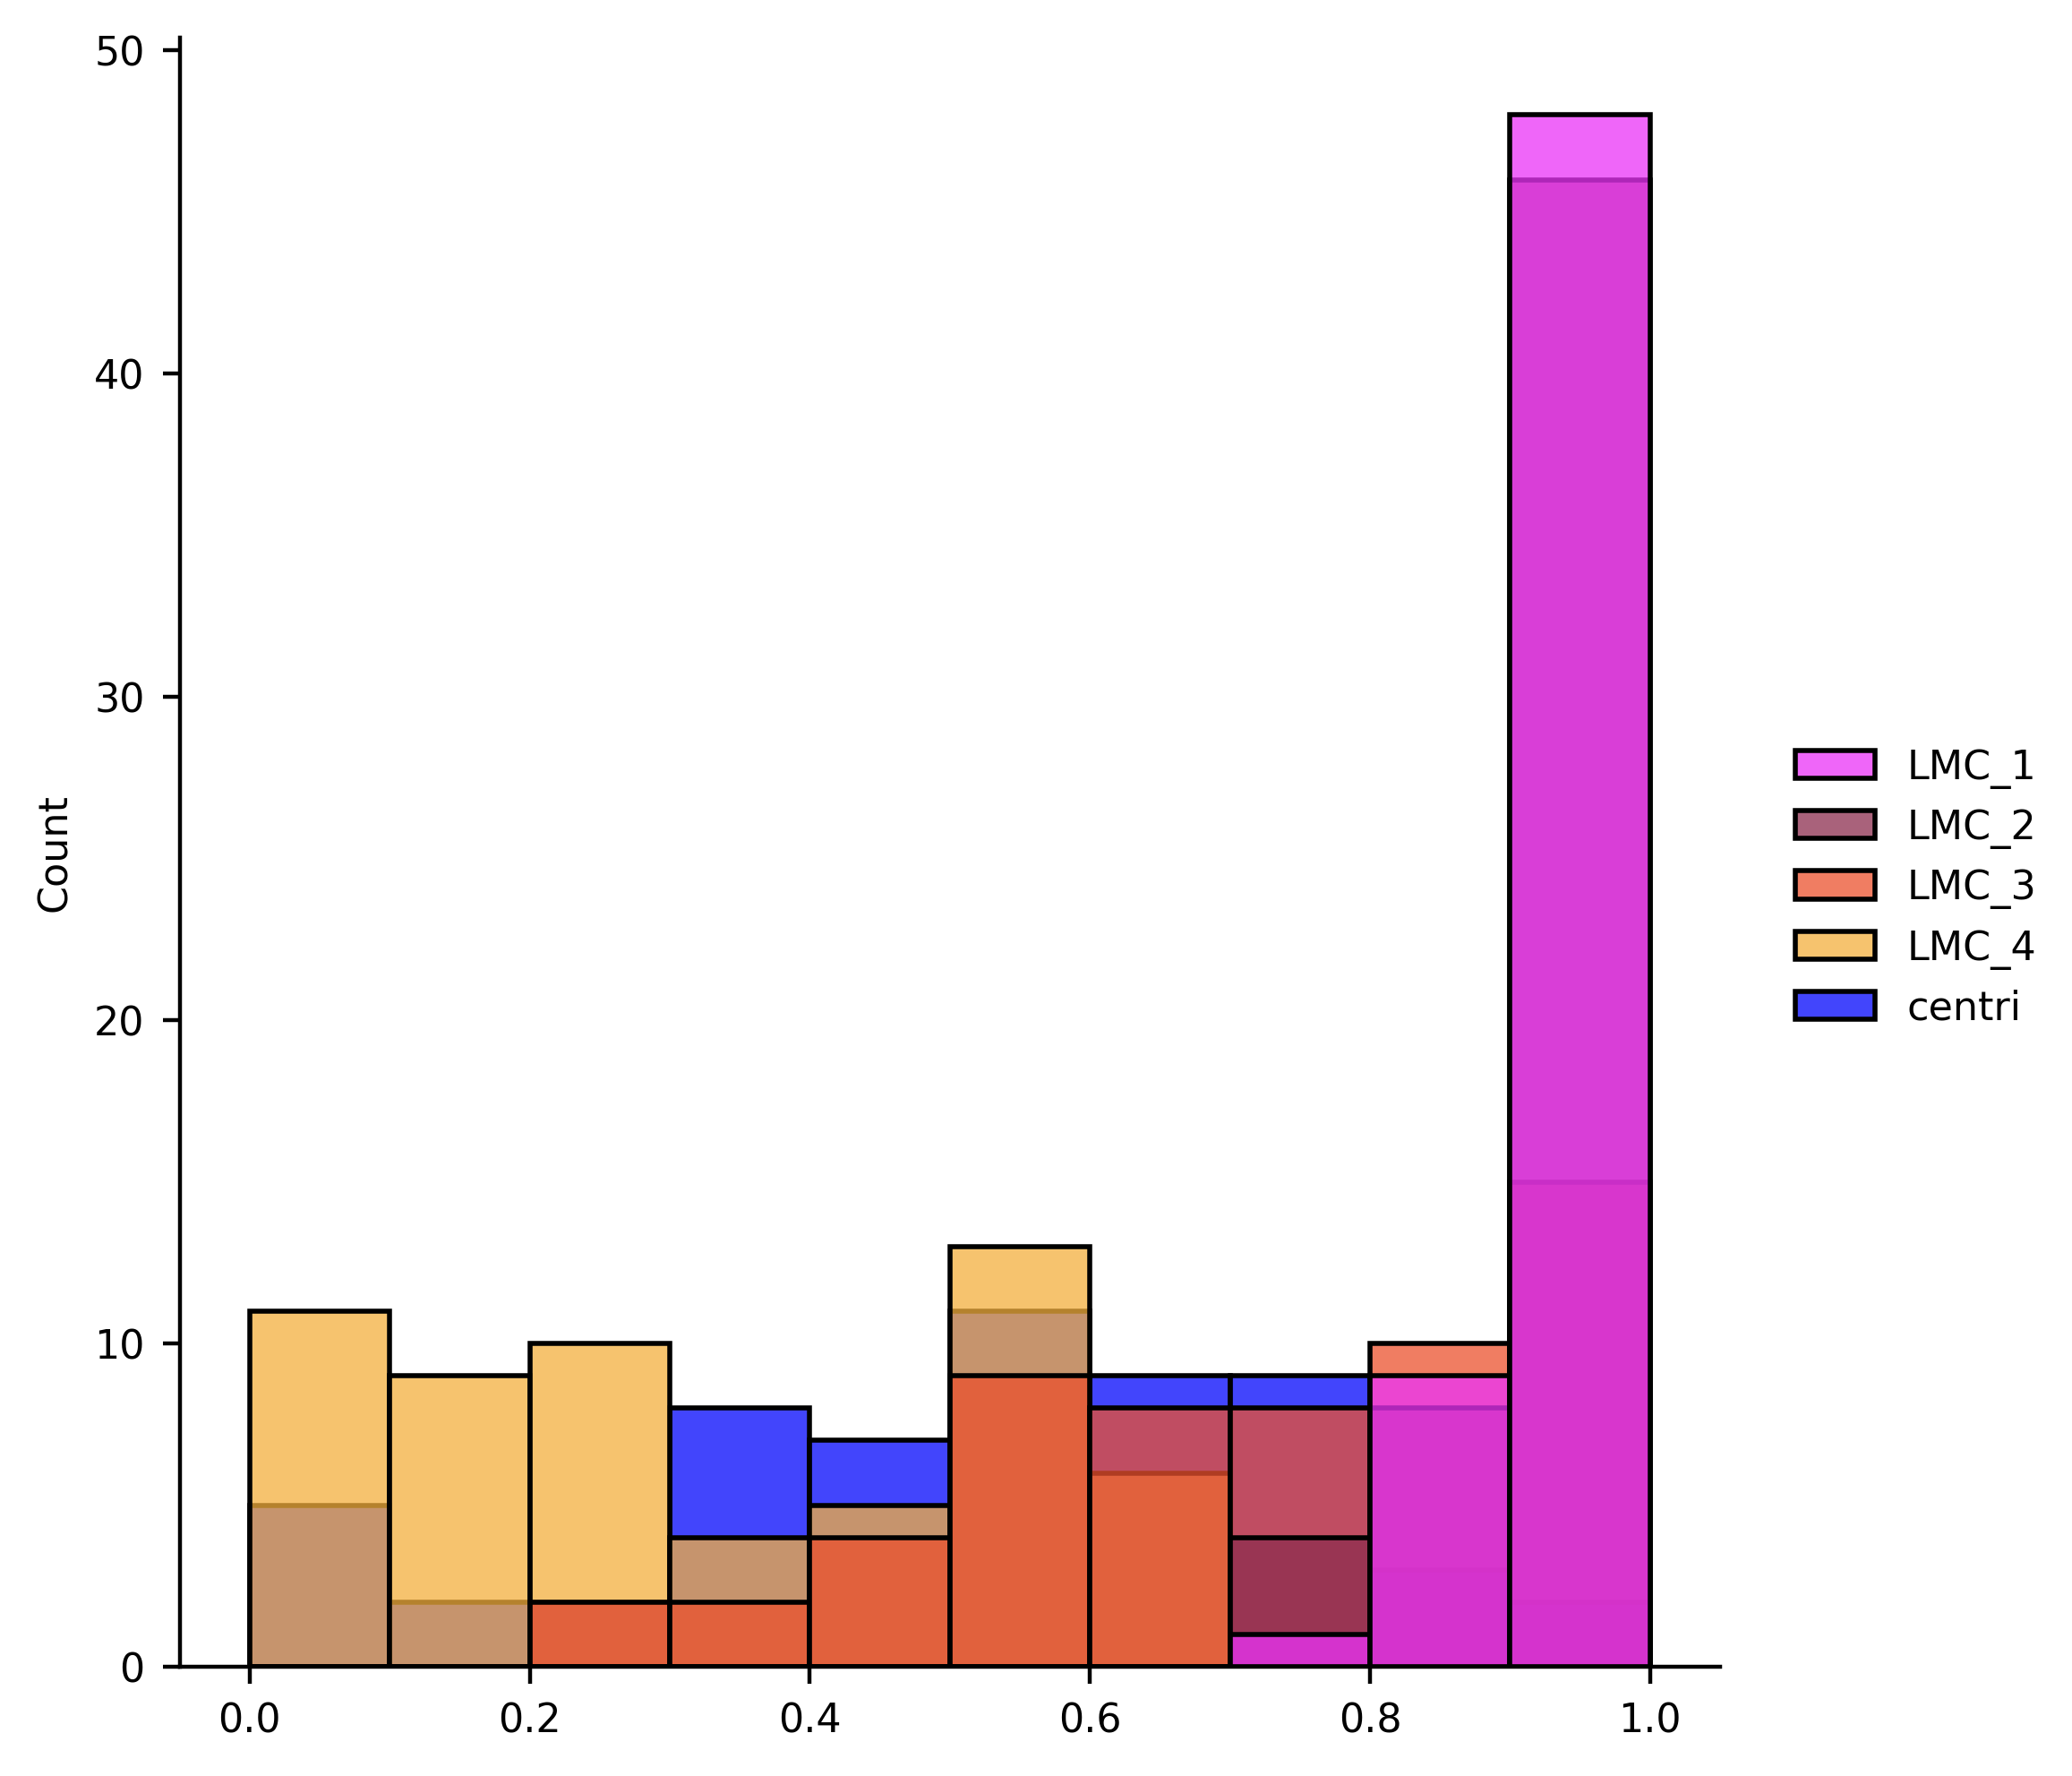

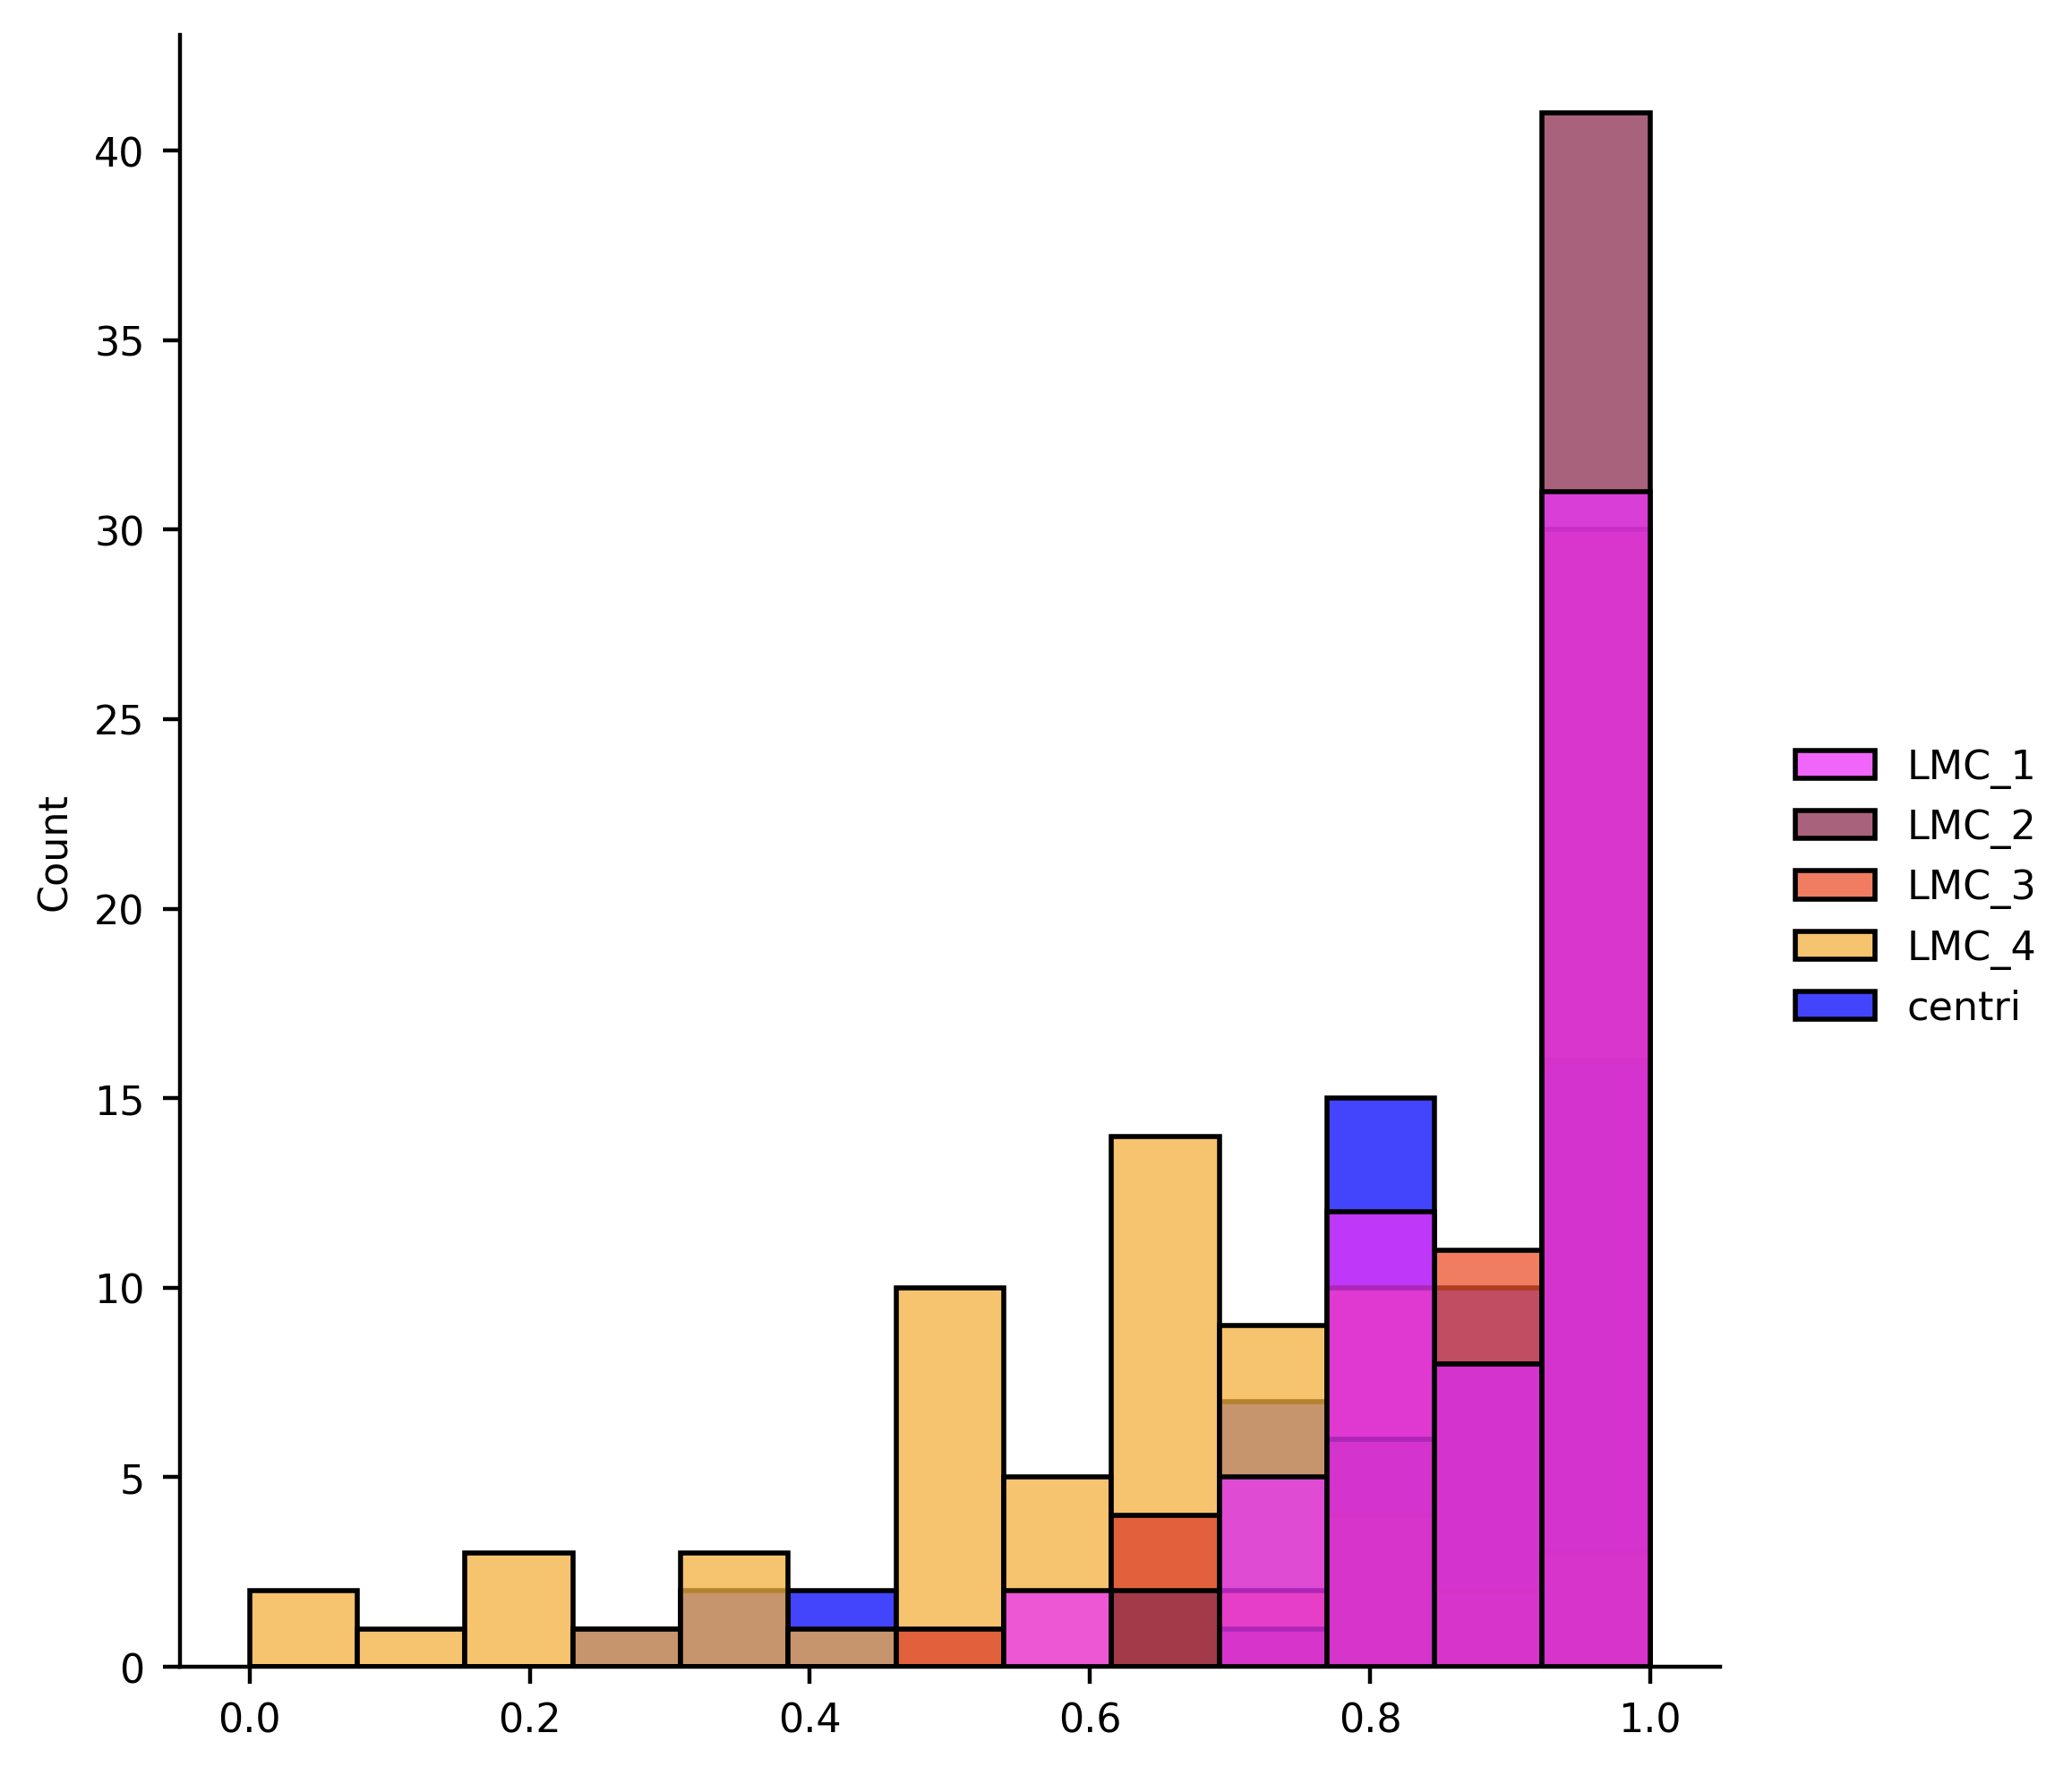

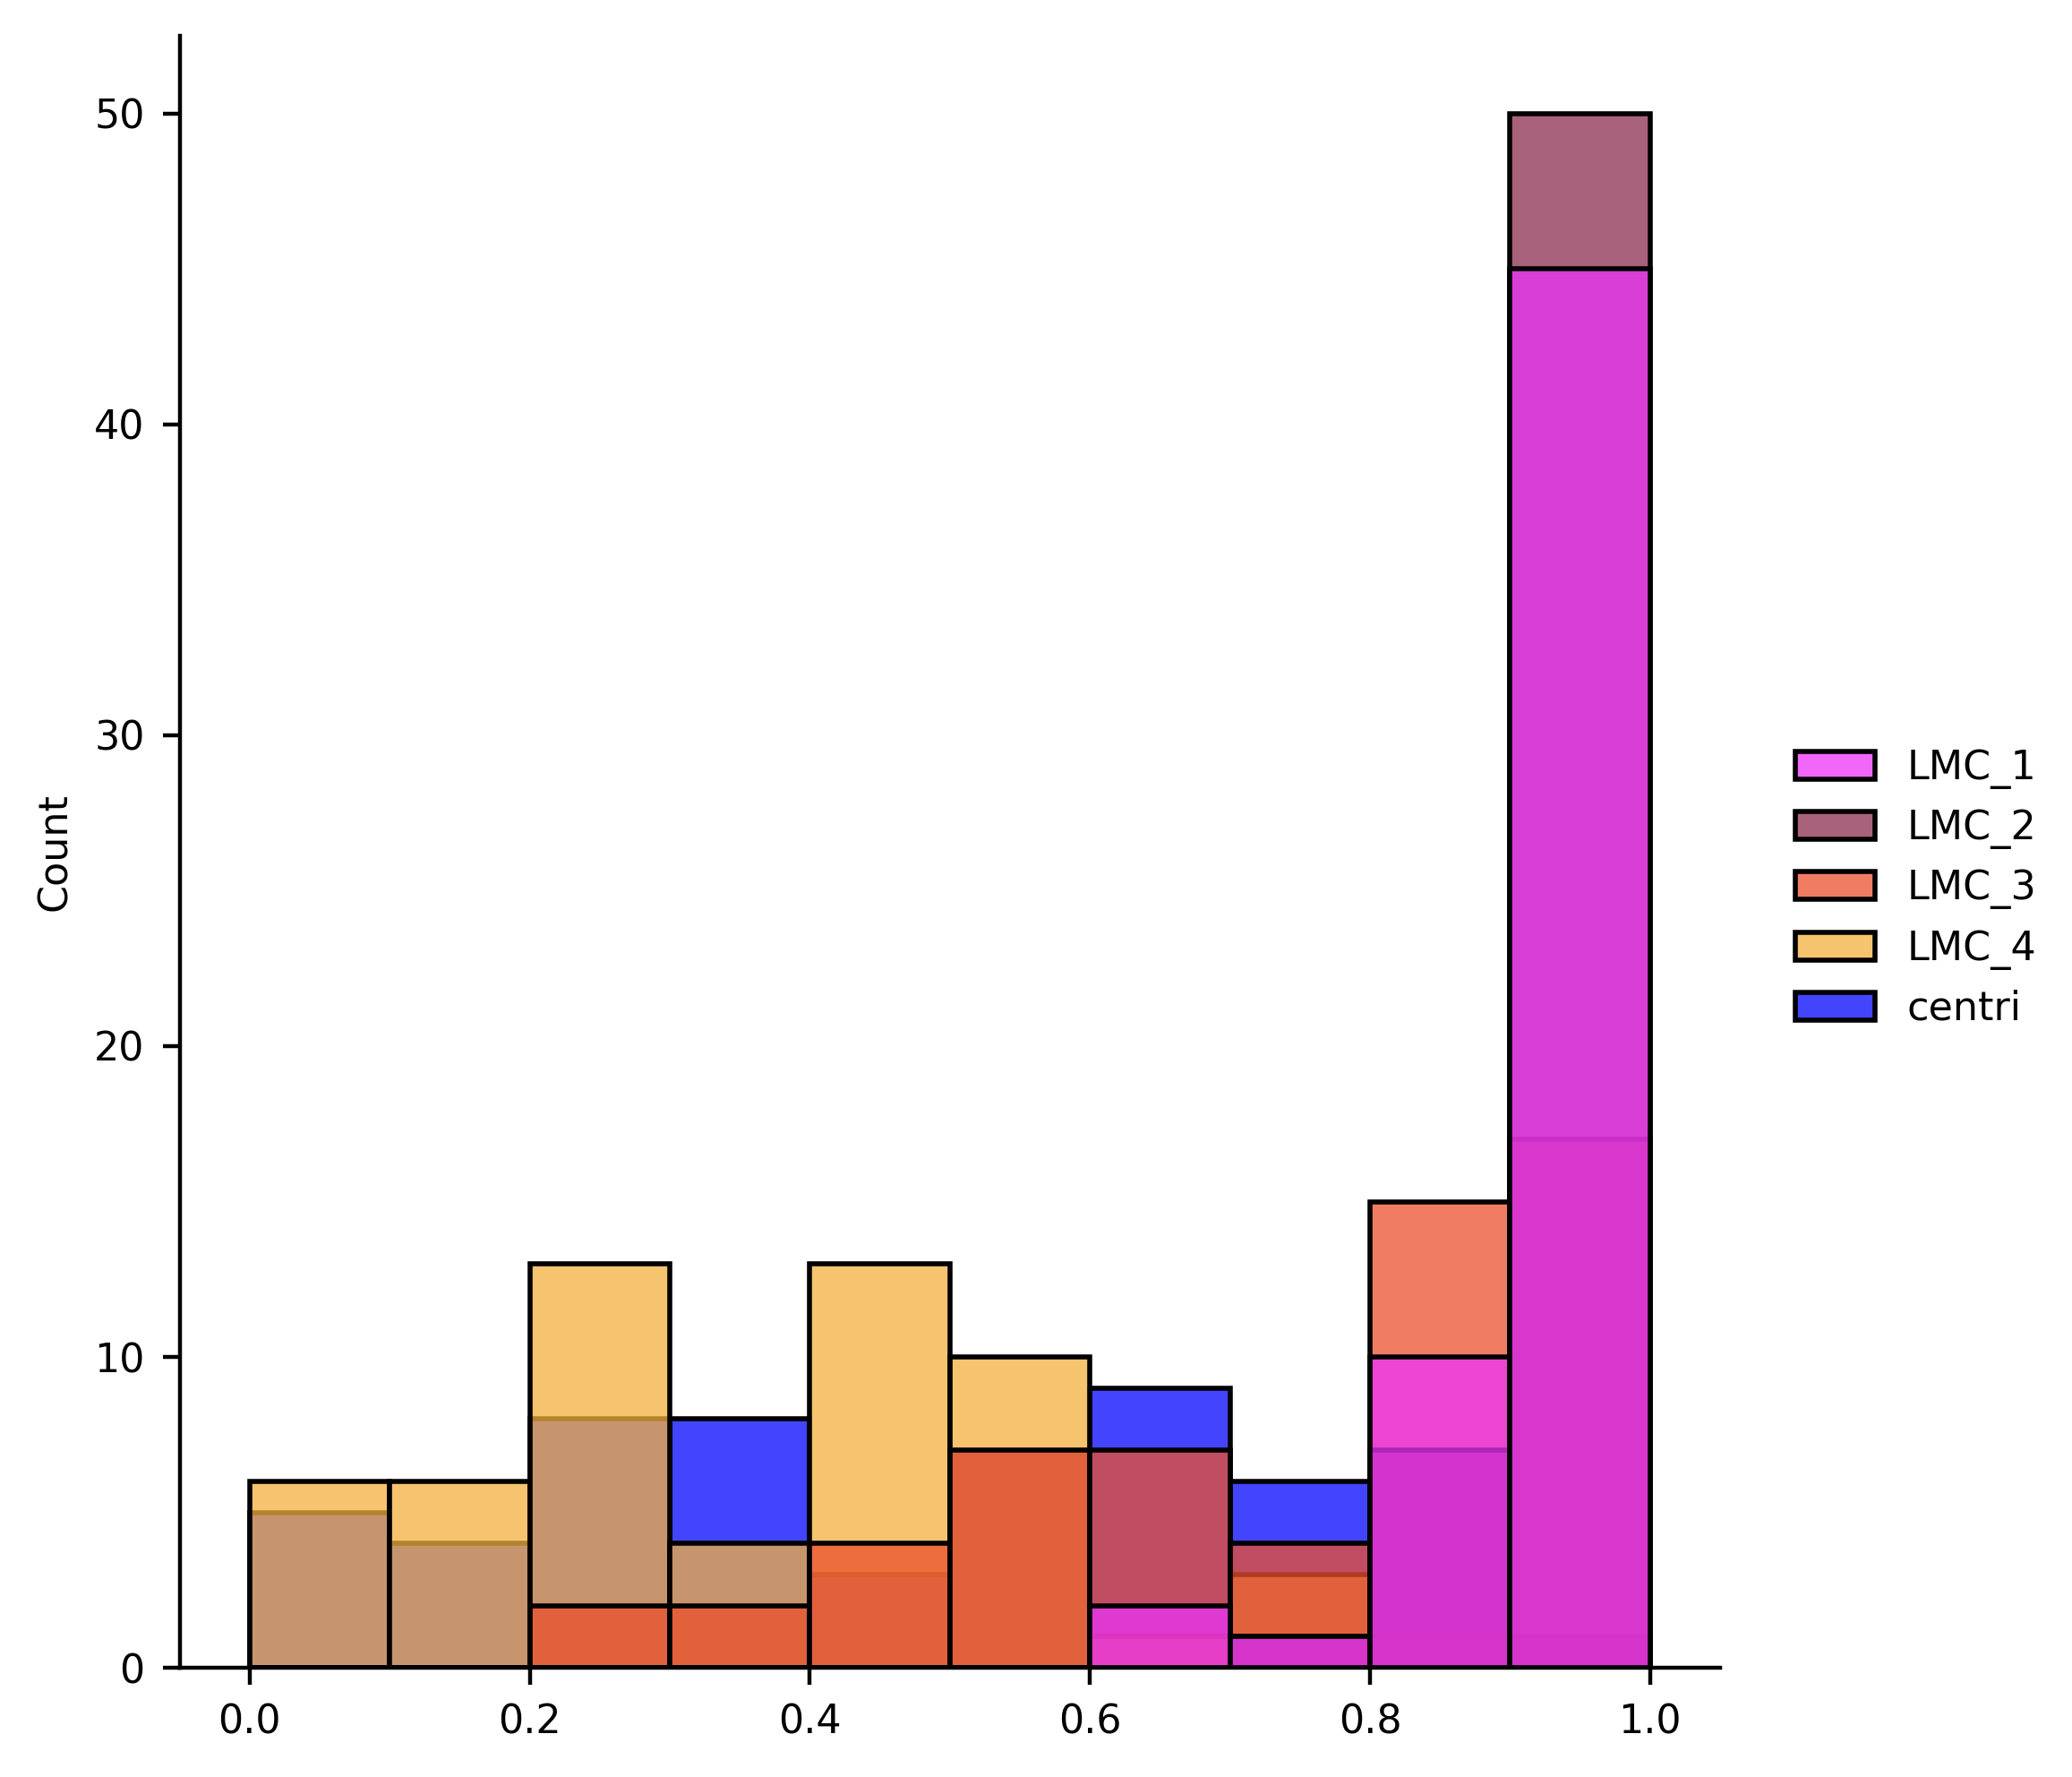

In [51]:
these_pre = ['R1R4', 'R2R5', 'R3R6']
these_post = ['LMC_1', 'LMC_2', 'LMC_3', 'LMC_4', 'centri']

for pre, rows in percent_multi.groupby('pre_type'):
    display(f"{pre}->")
    display(rows[these_post].mean())
    display(rows[these_post].std(ddof=0))

#fig, axes = plt.subplots(len(these_pre)) 
i = 0

for pre_type, rows in percent_multi.groupby('pre_type'):
    if pre_type in these_pre:
        g = sns.displot(data=rows.loc[:, these_post], palette=st_cm)
        #g.set_title(pre_type)
        i += 1
    else:
        continue

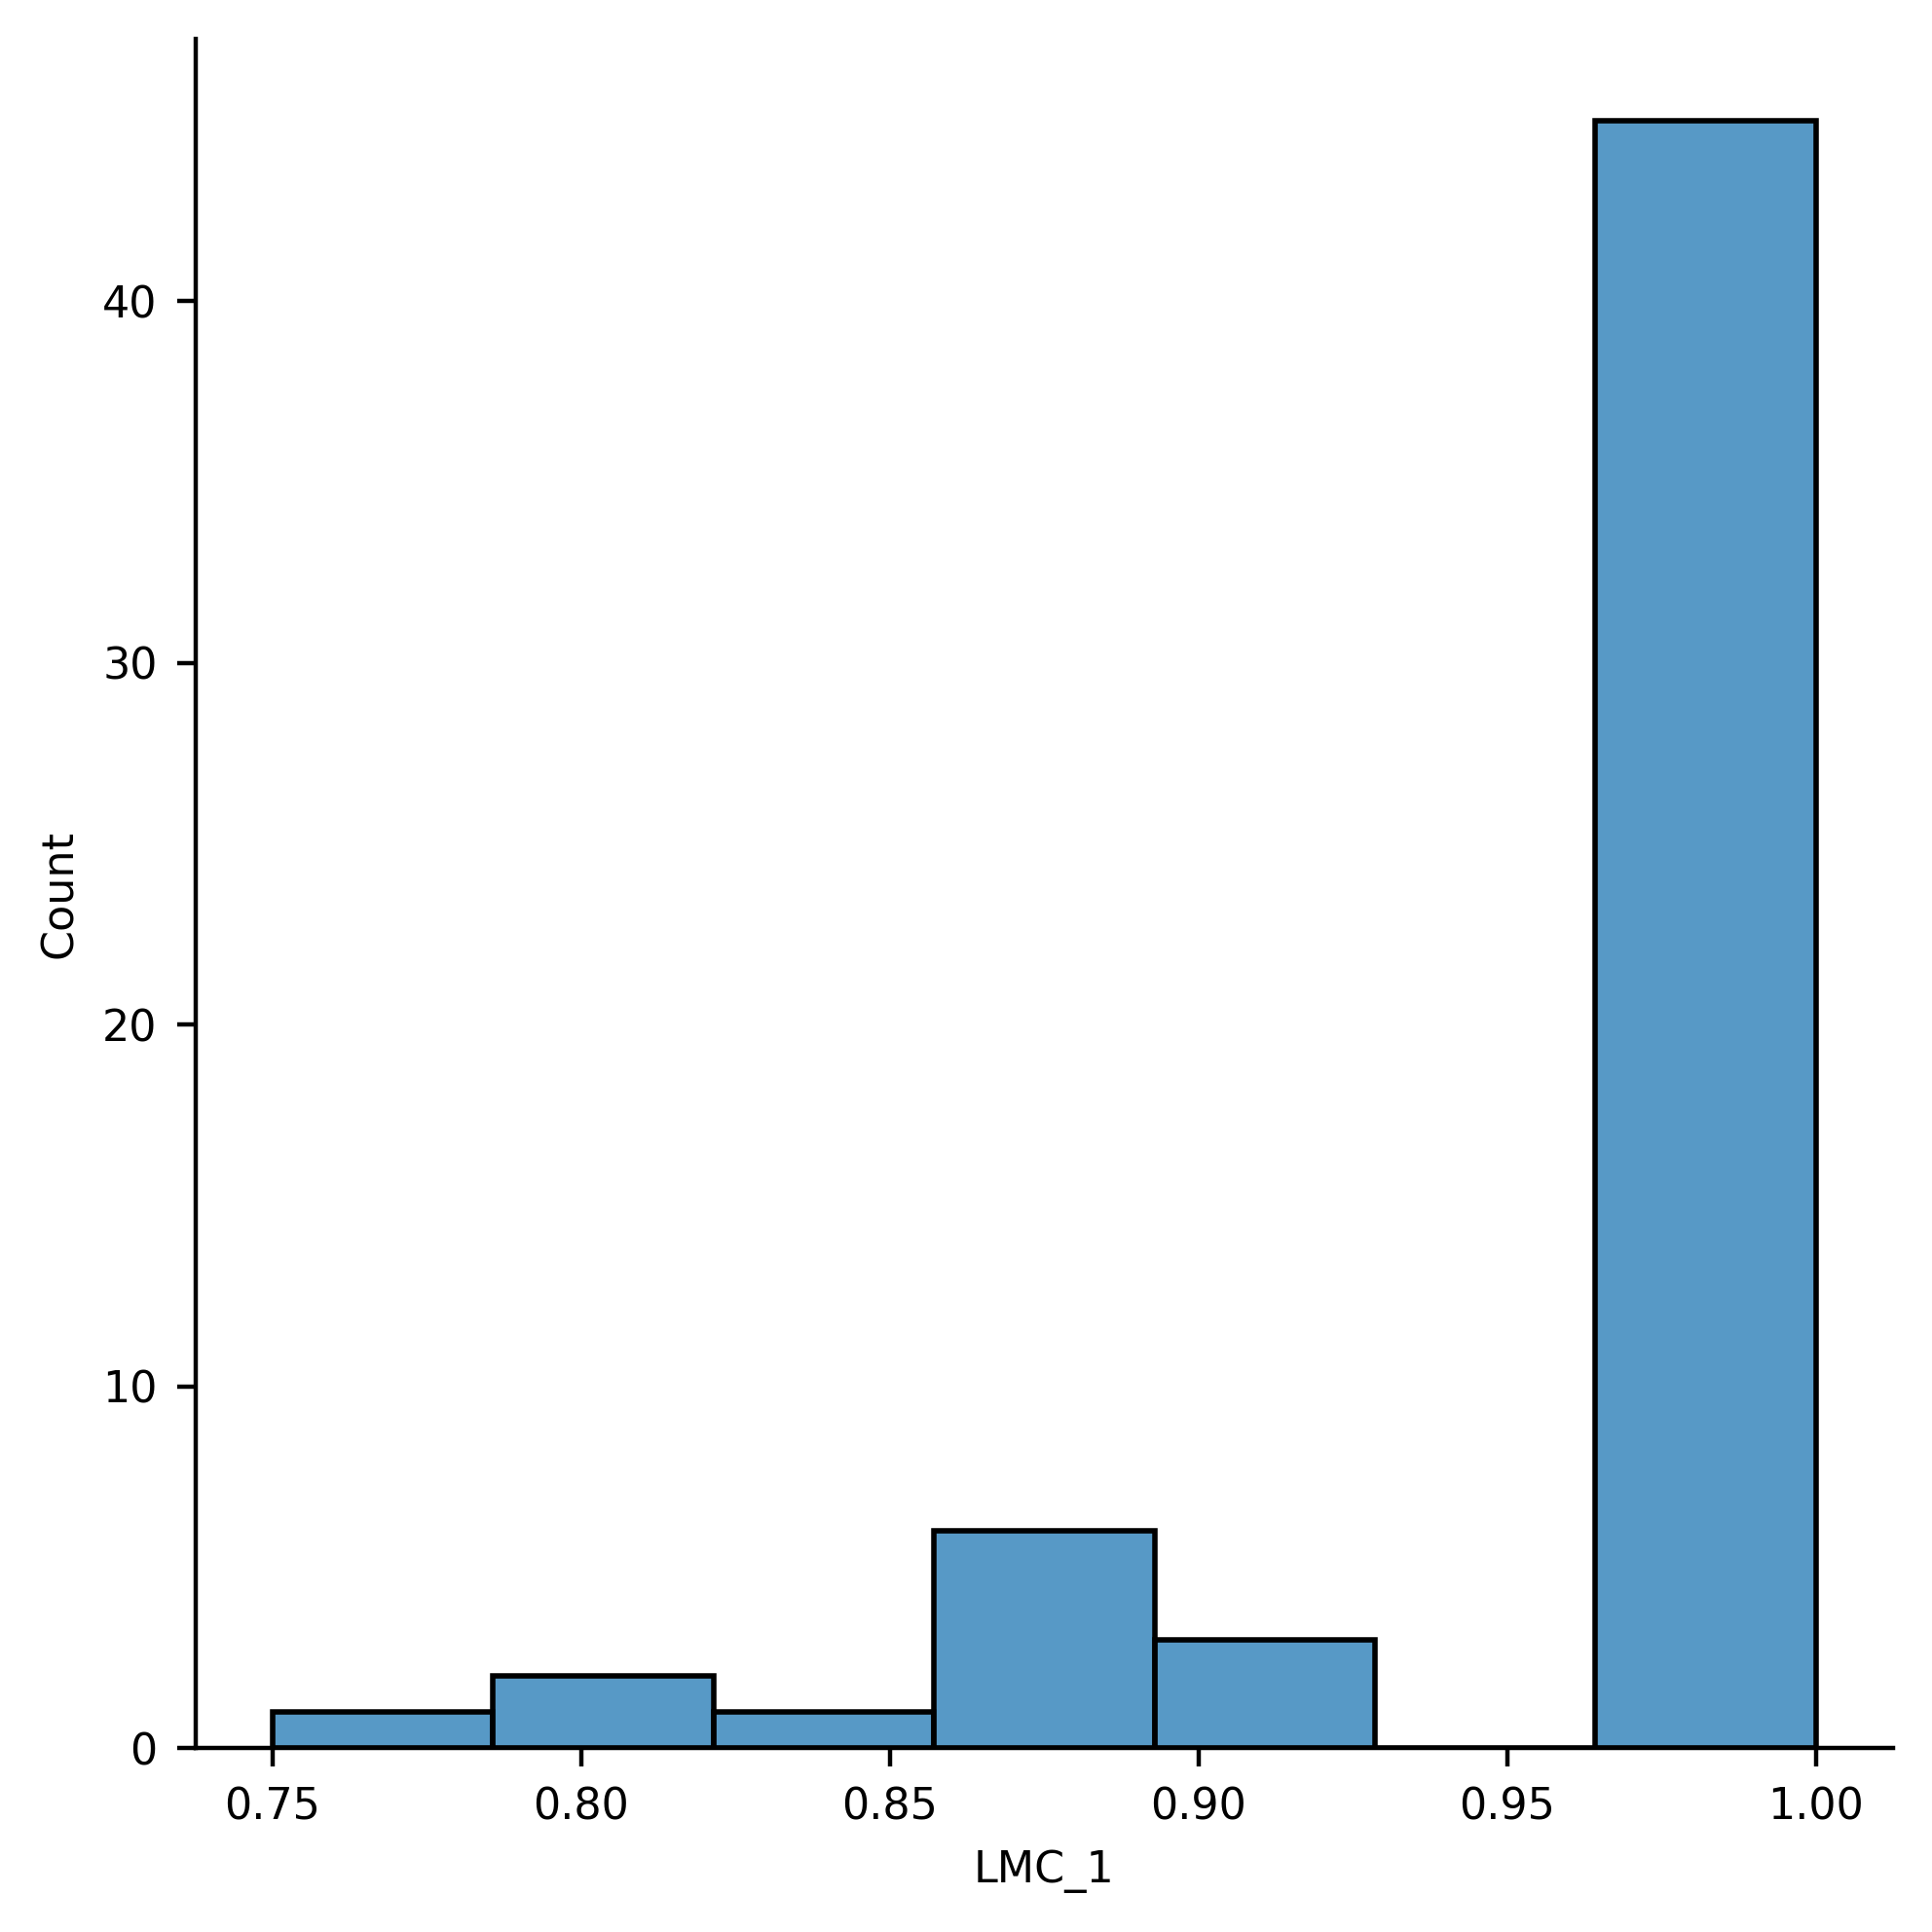

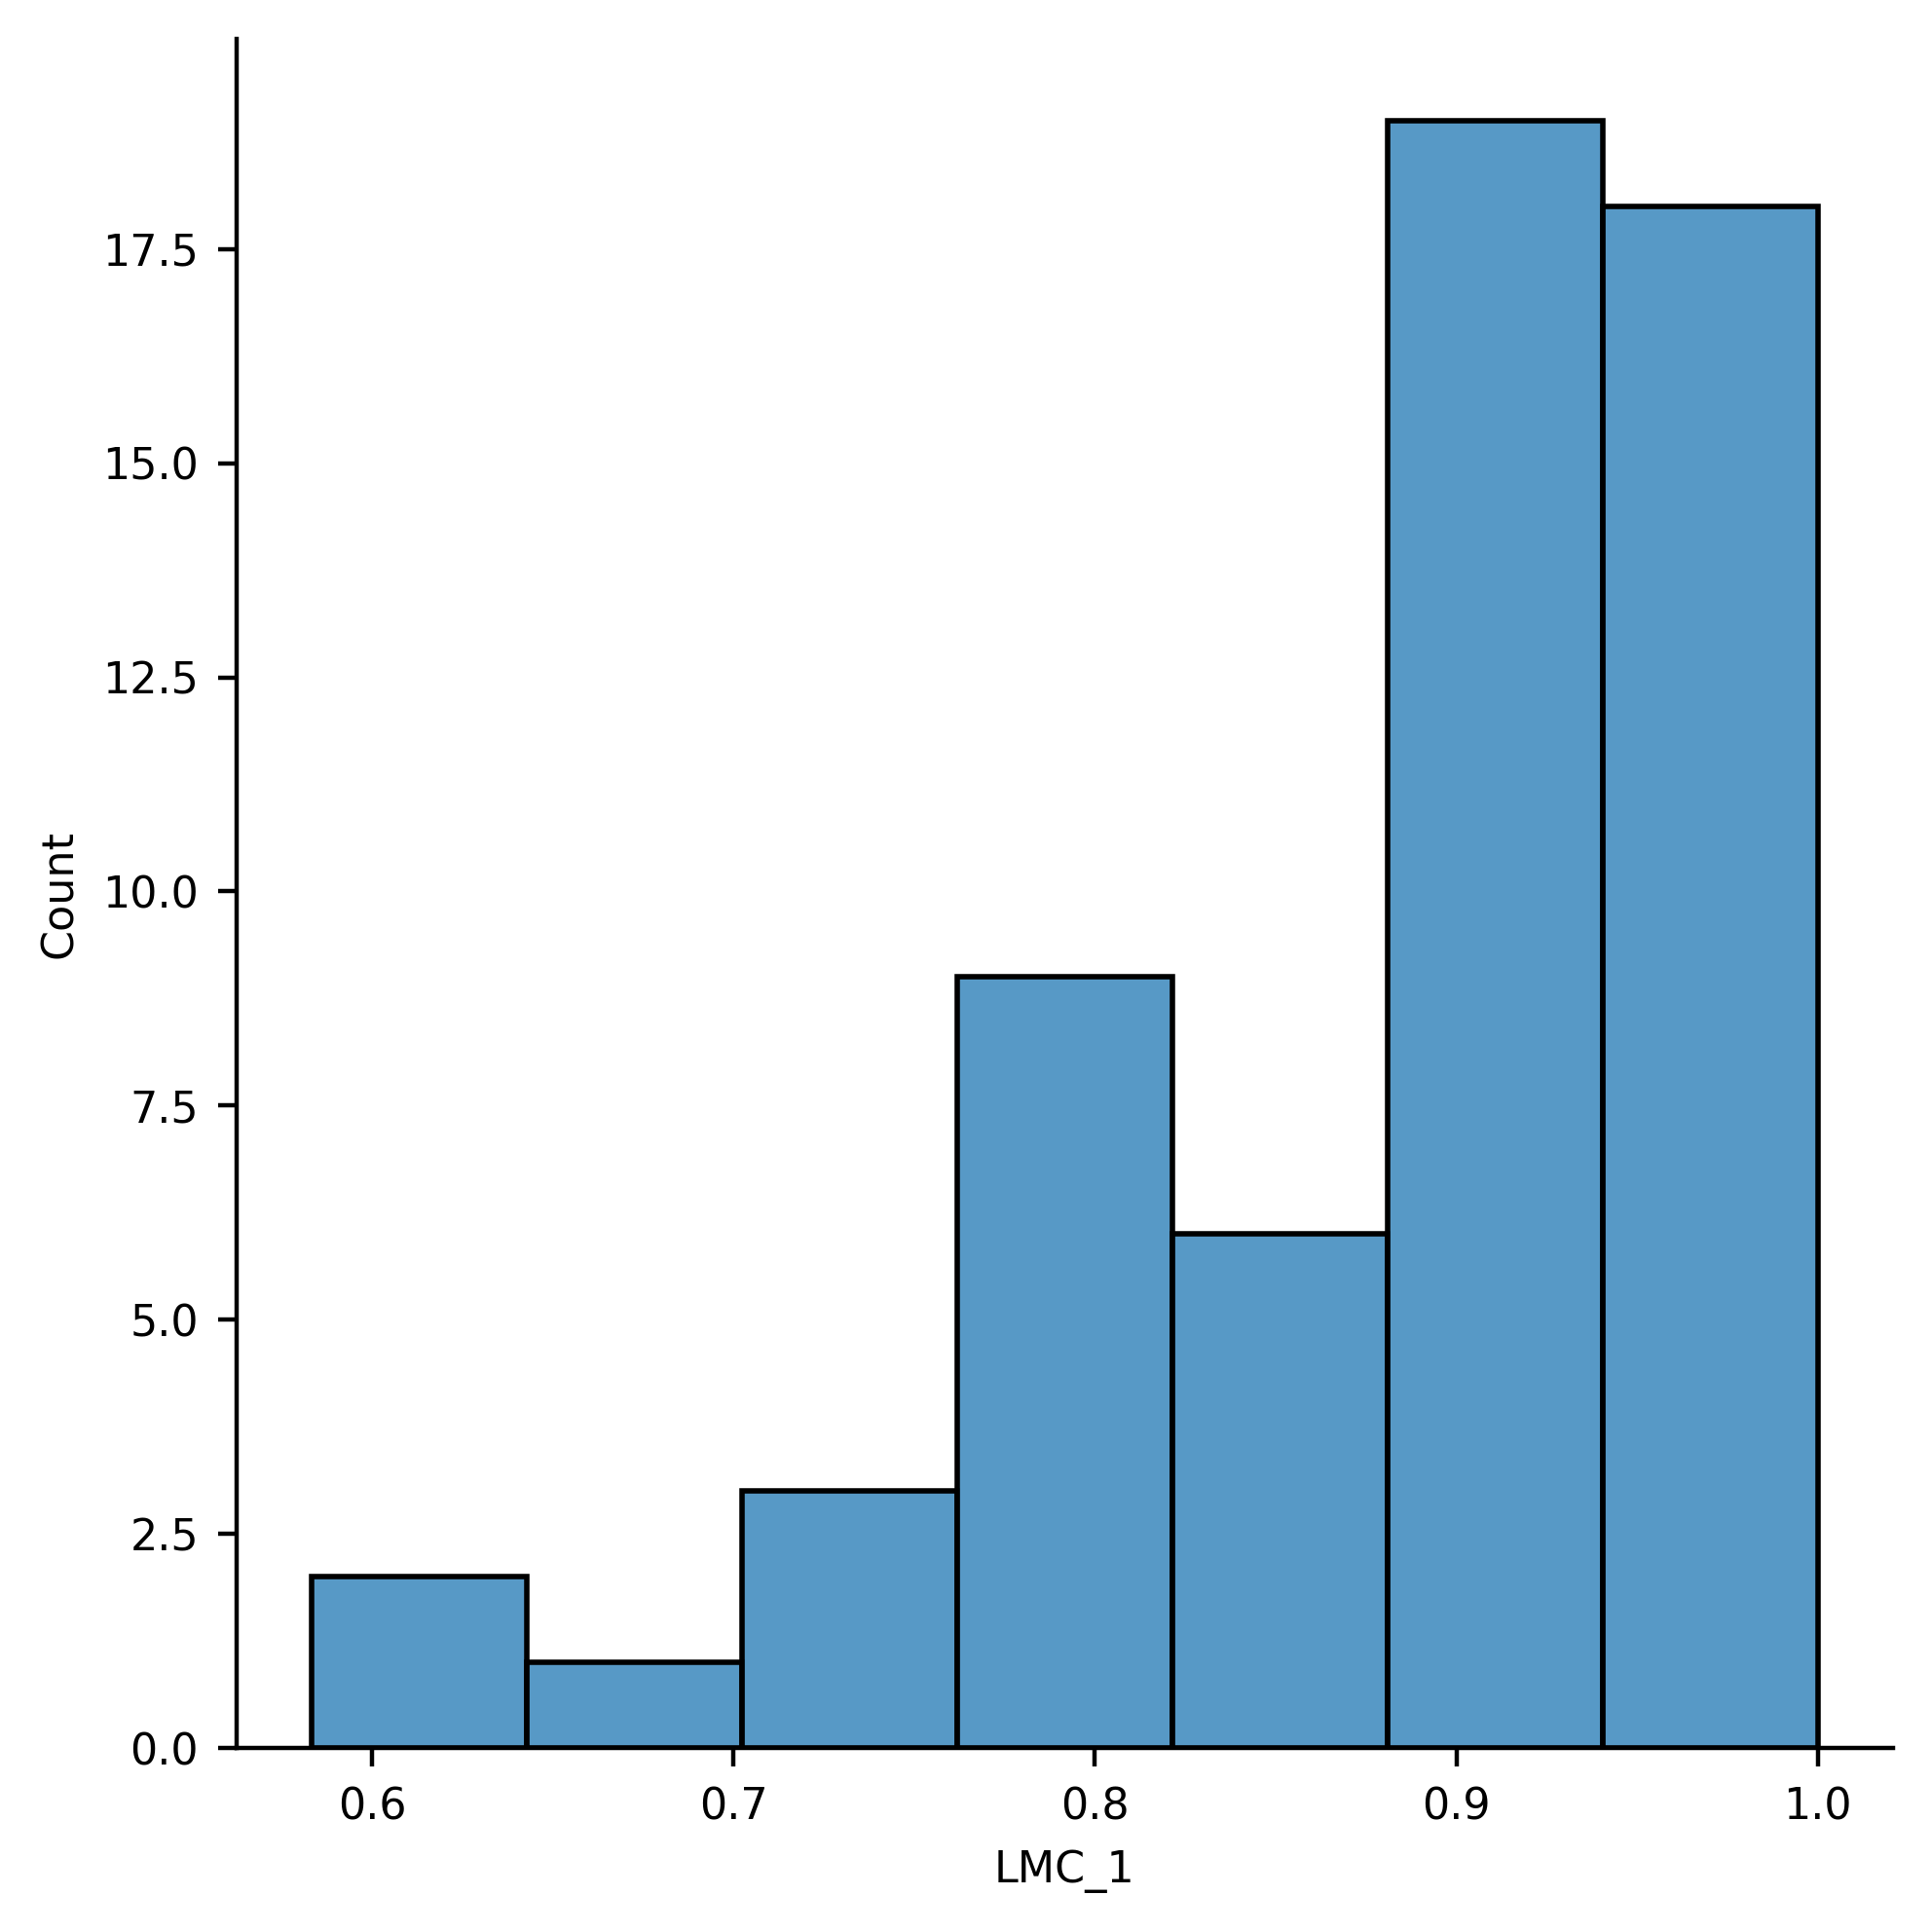

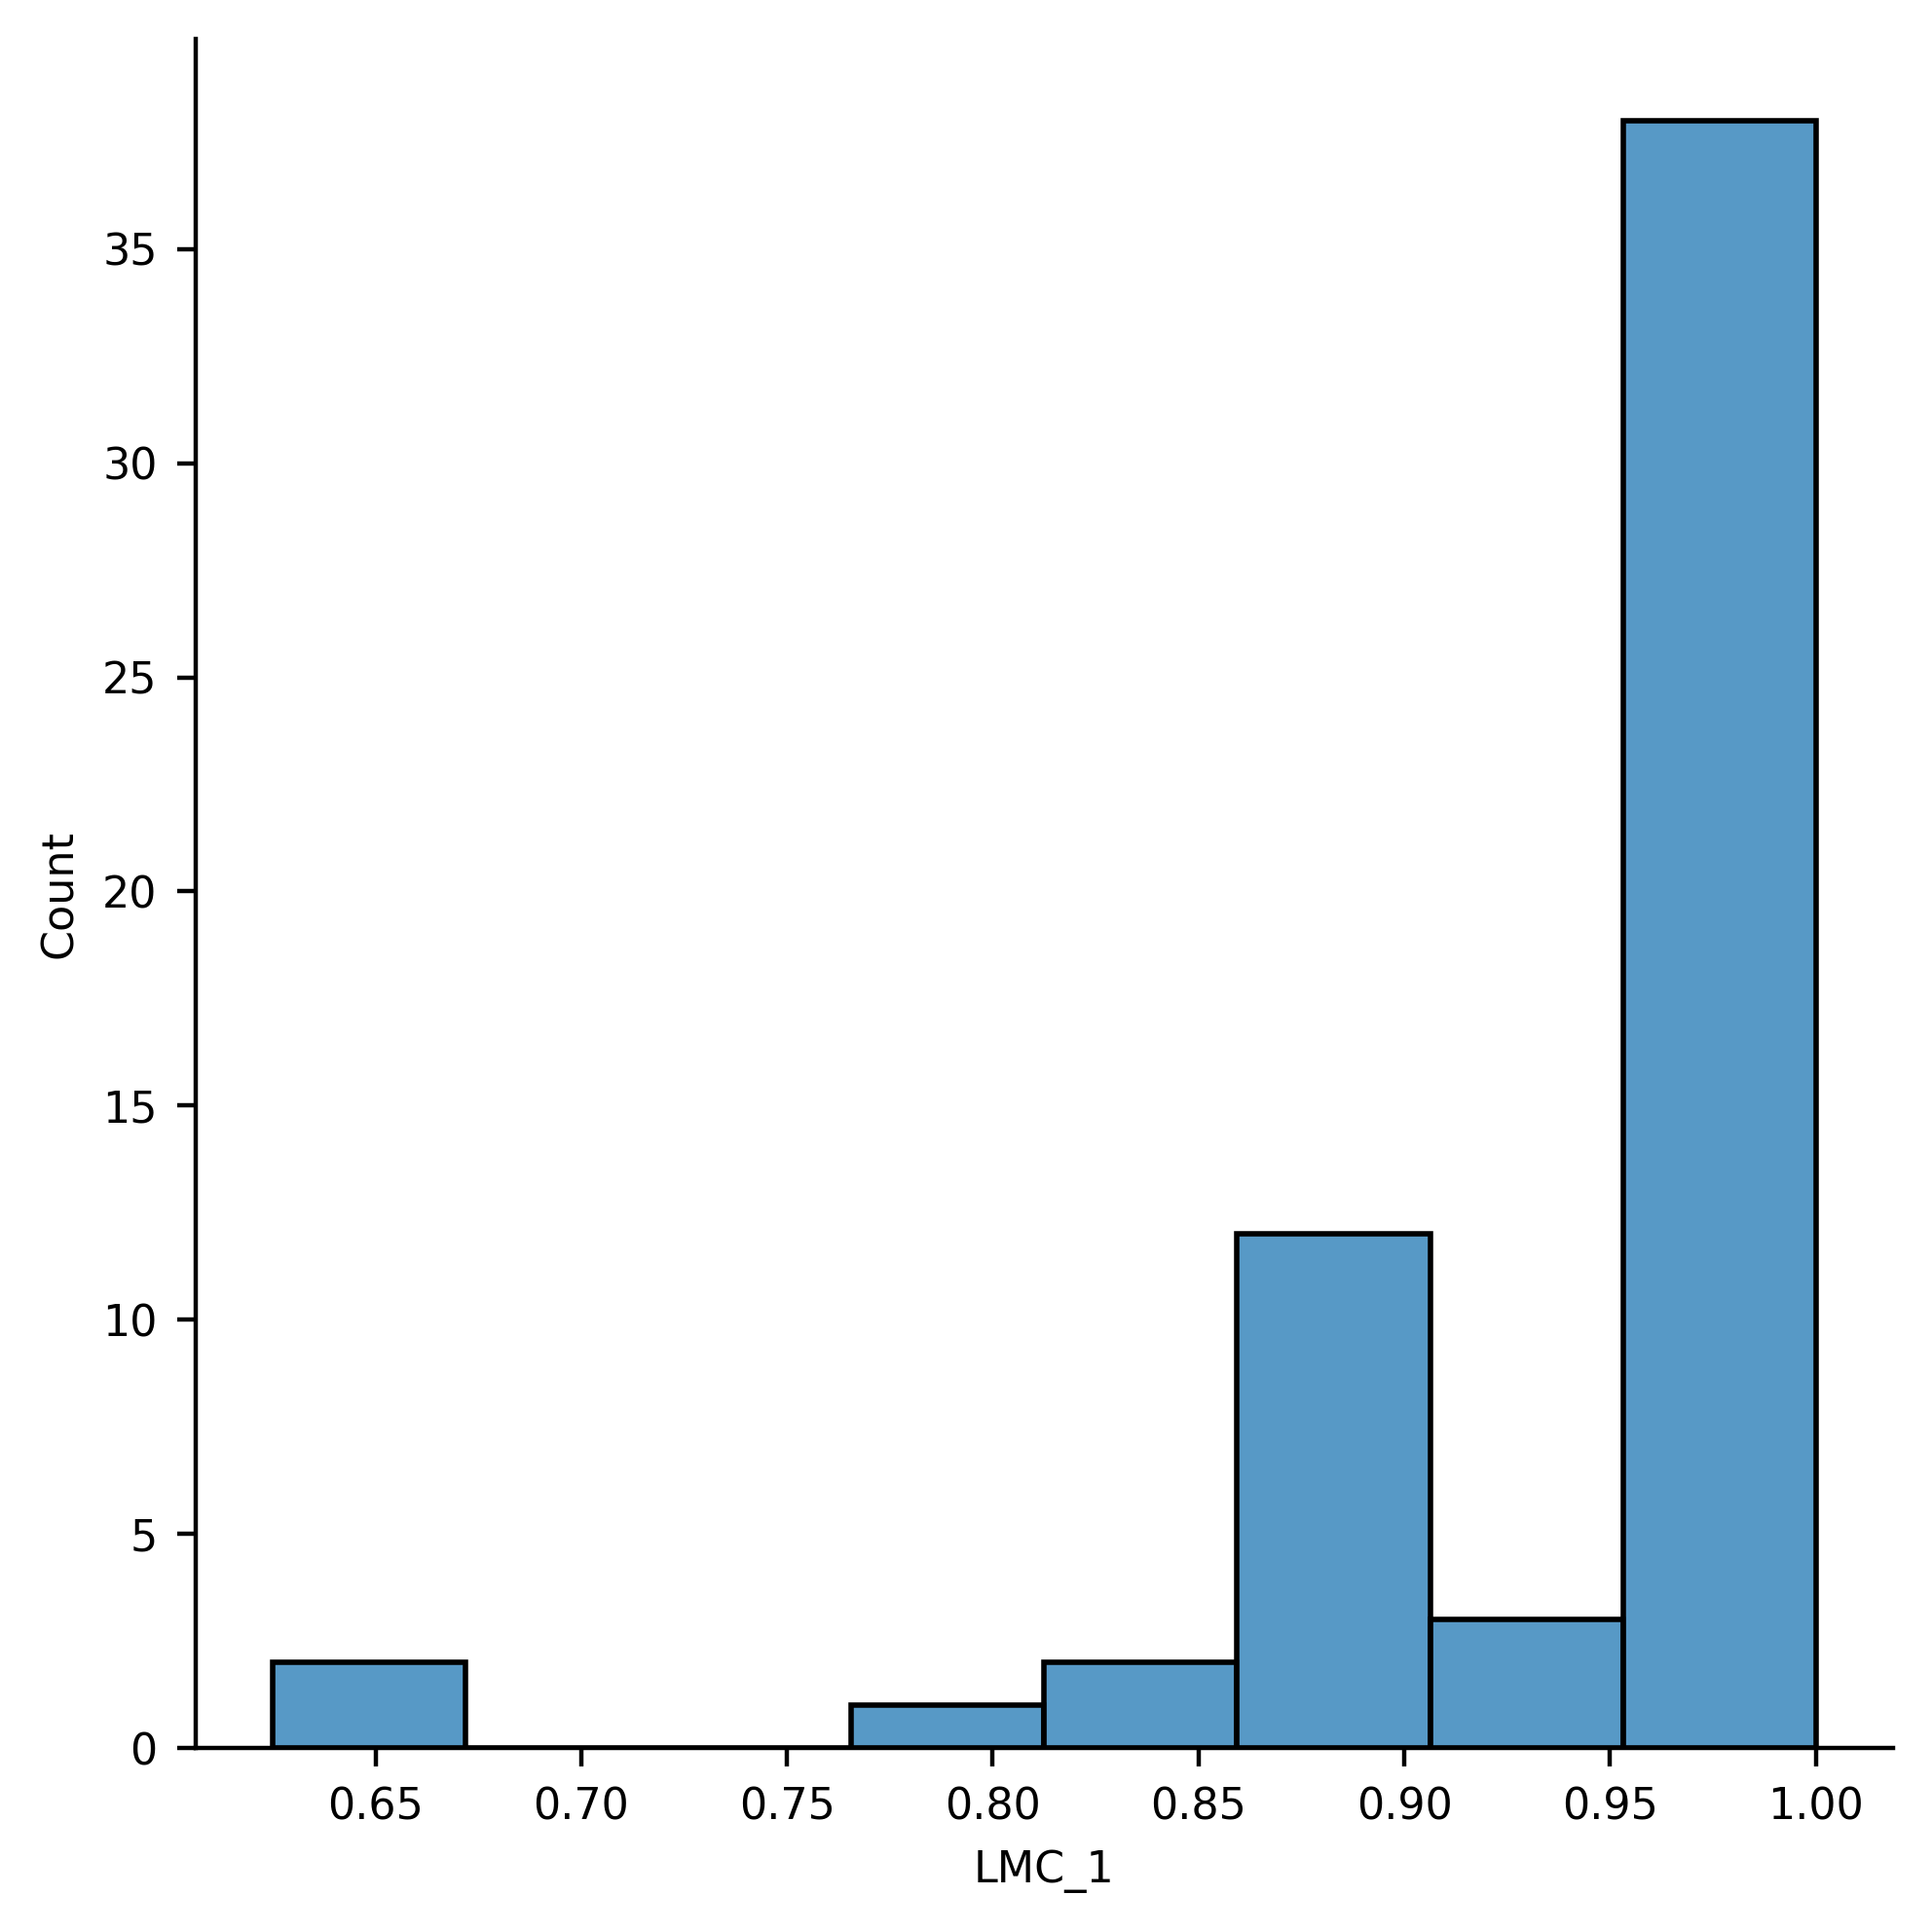

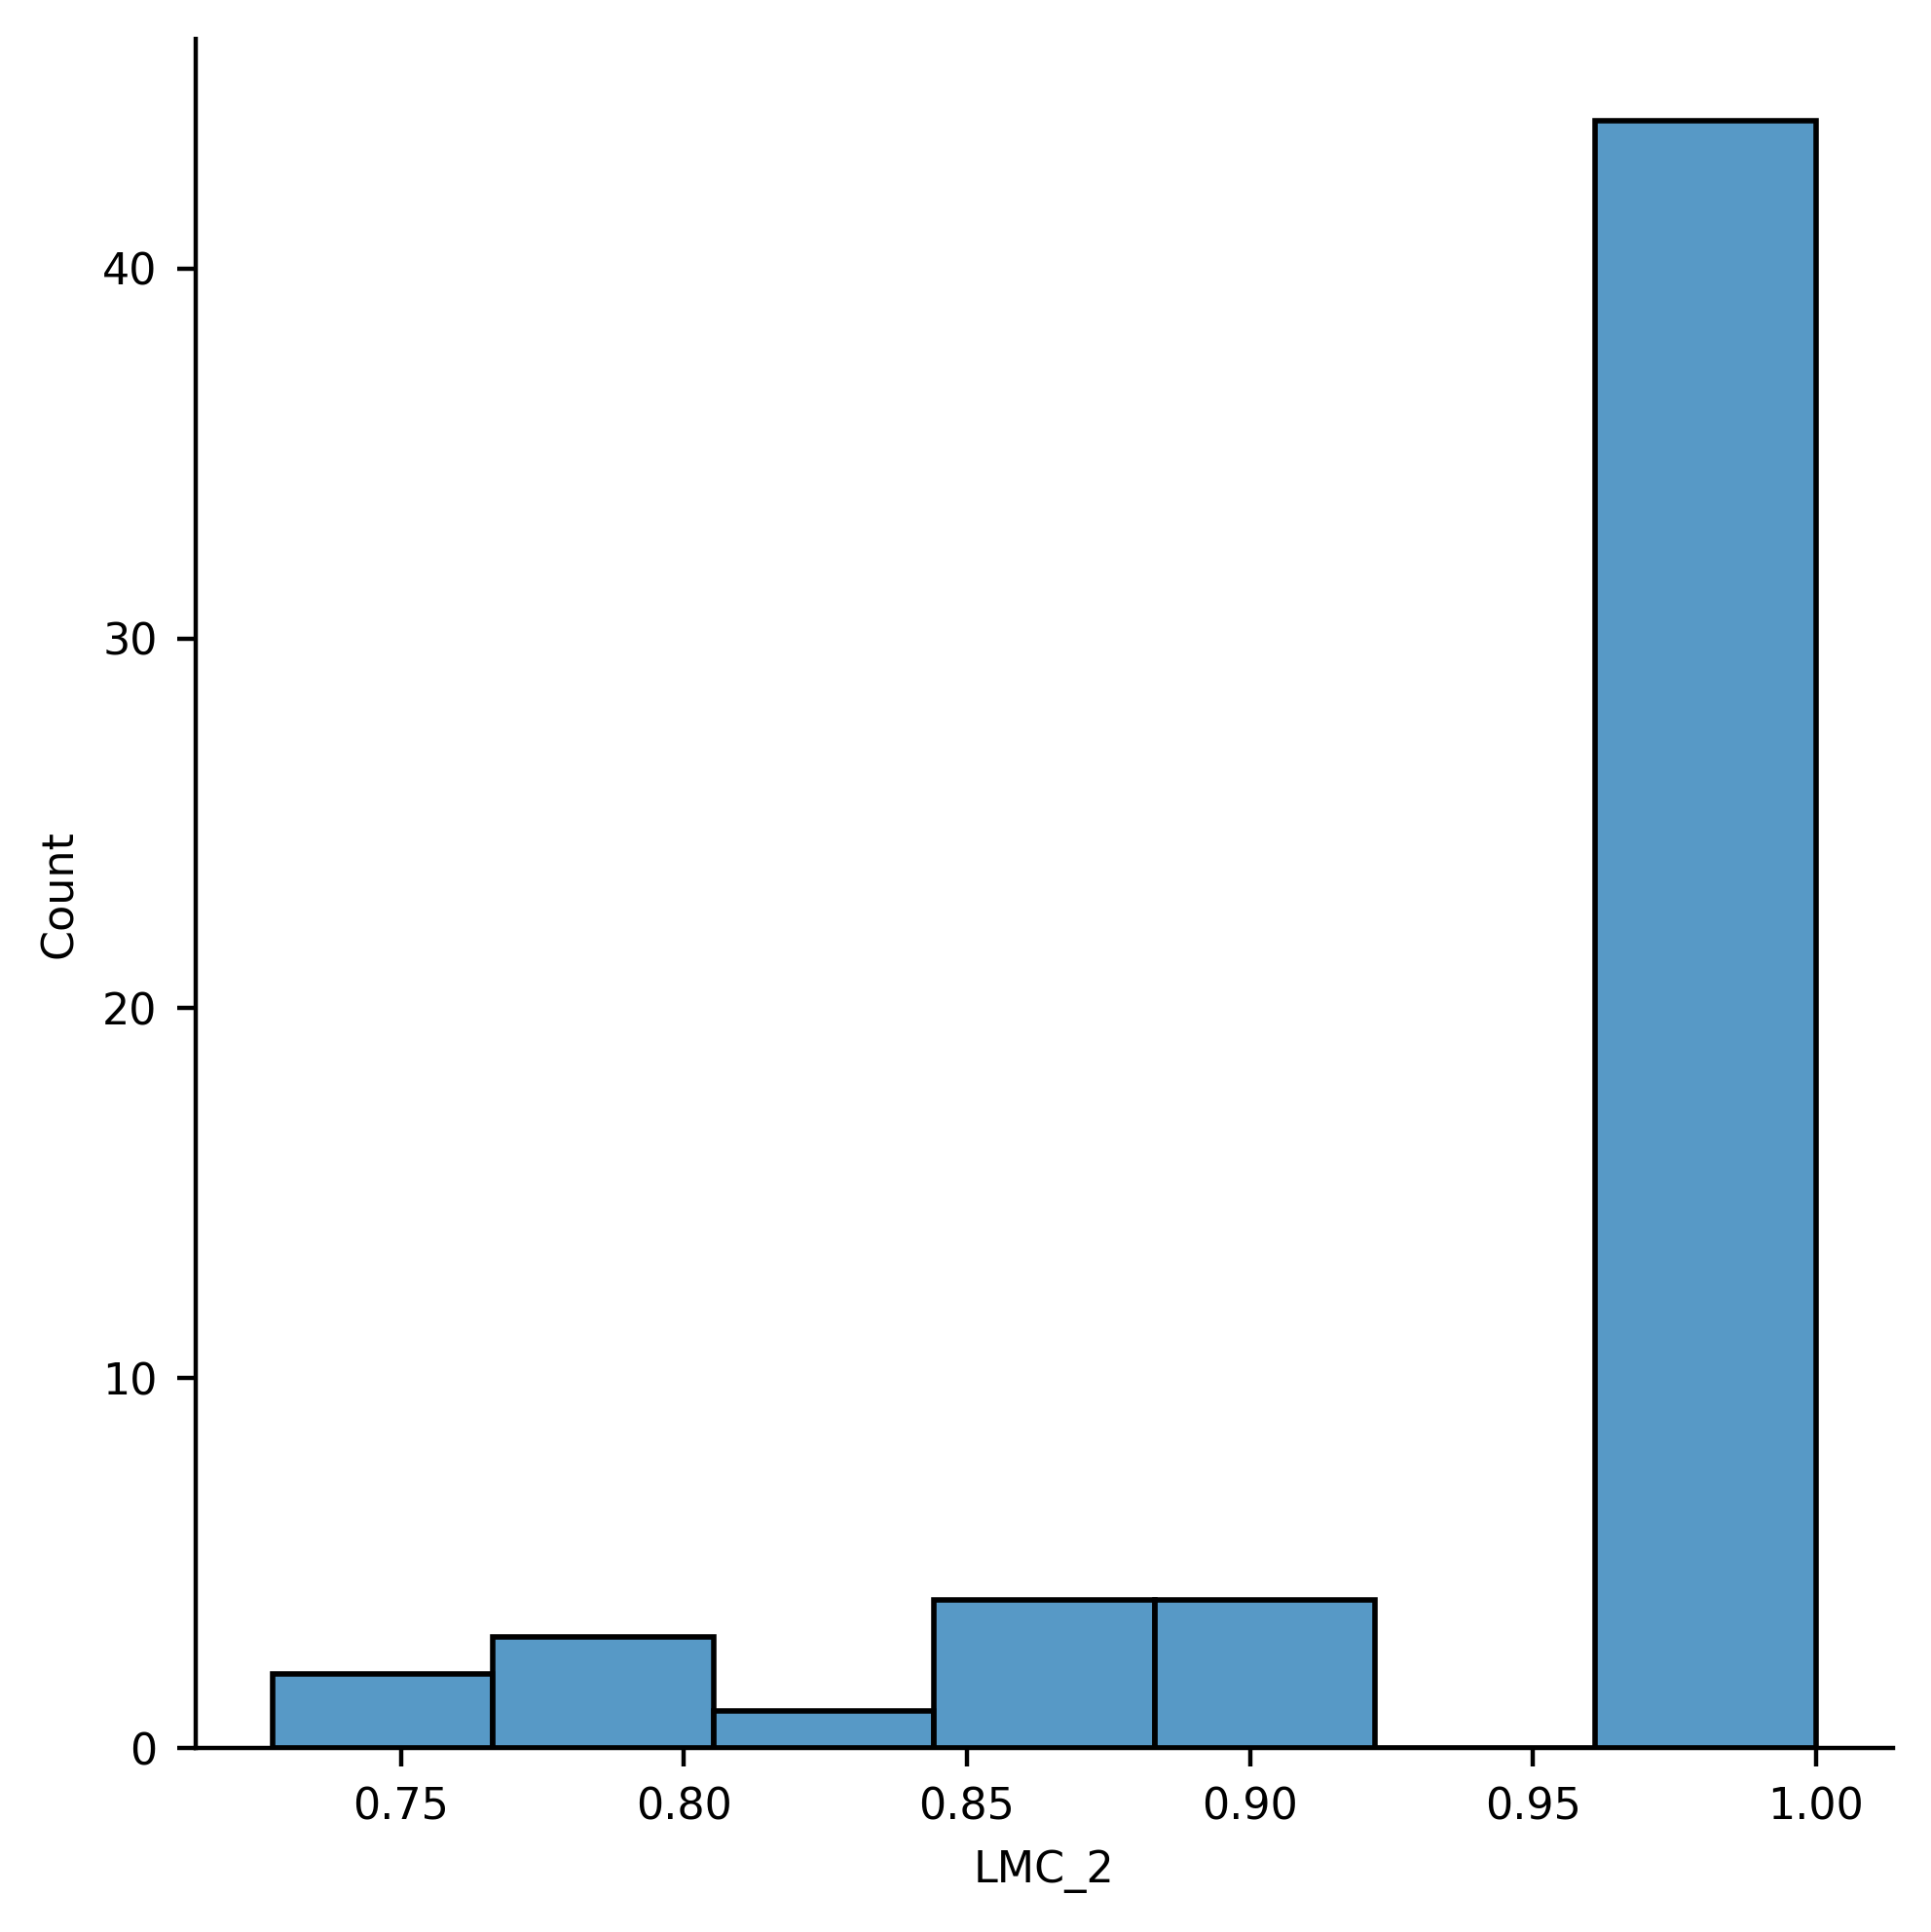

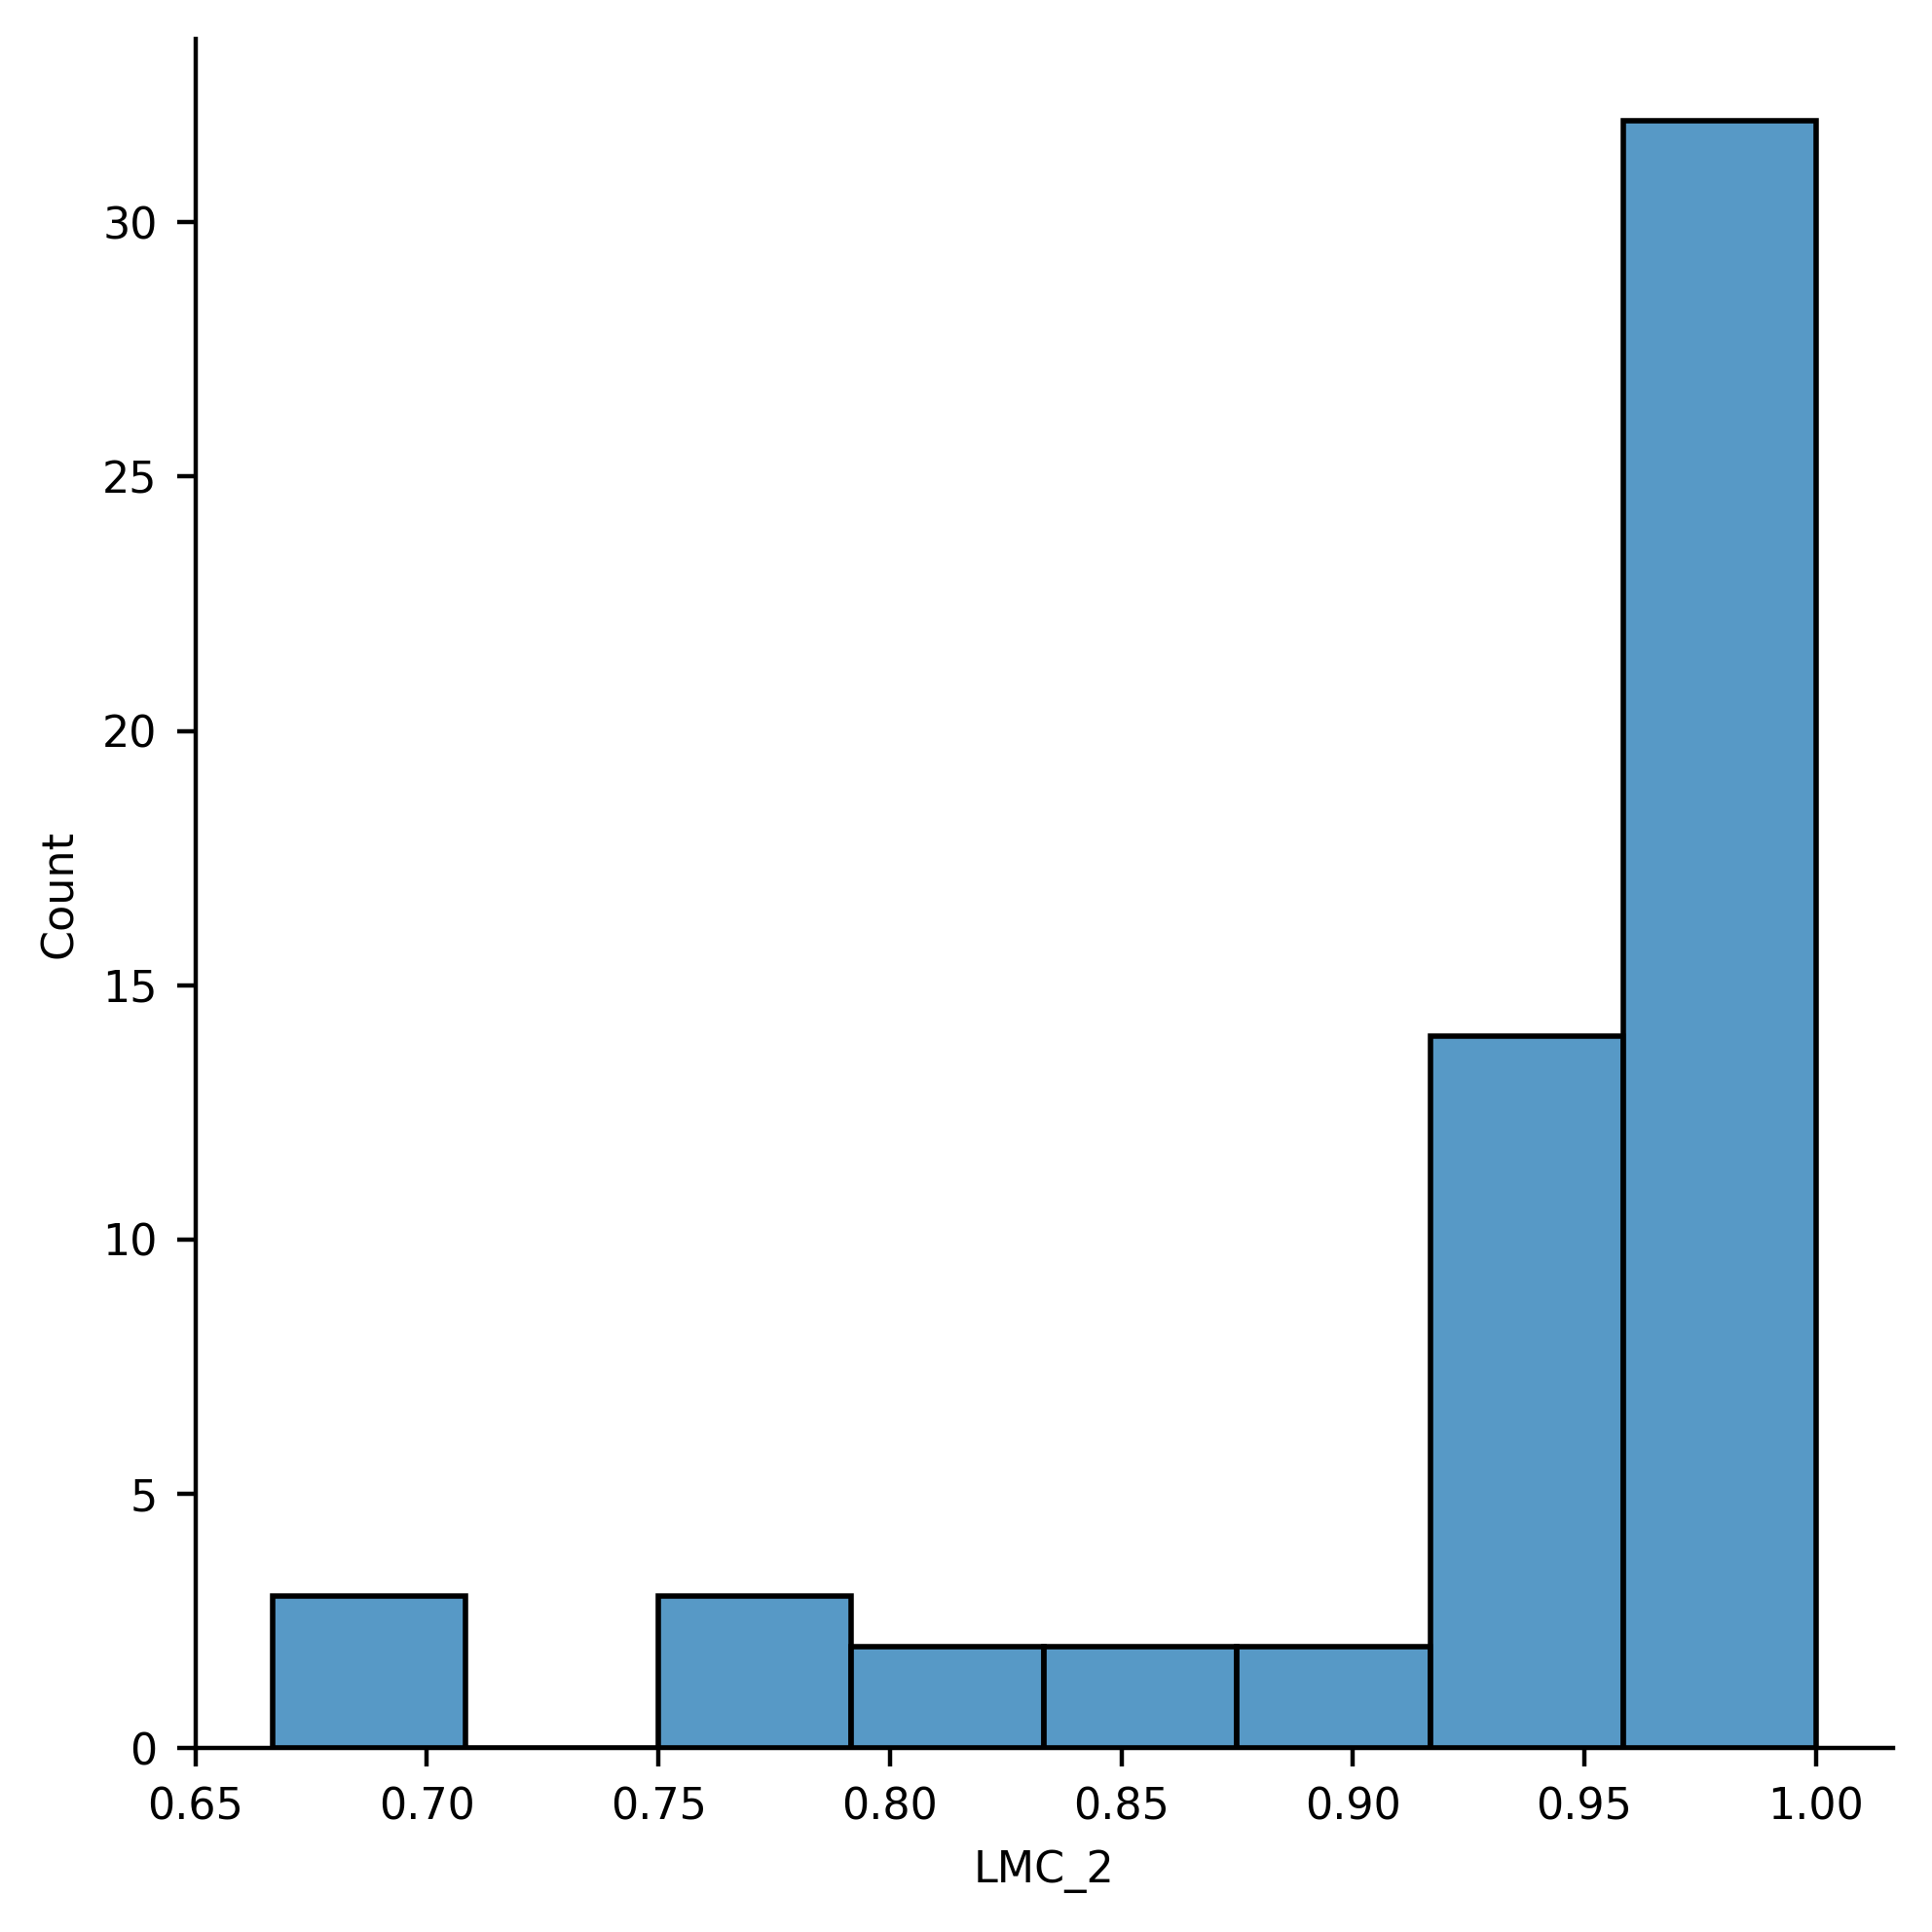

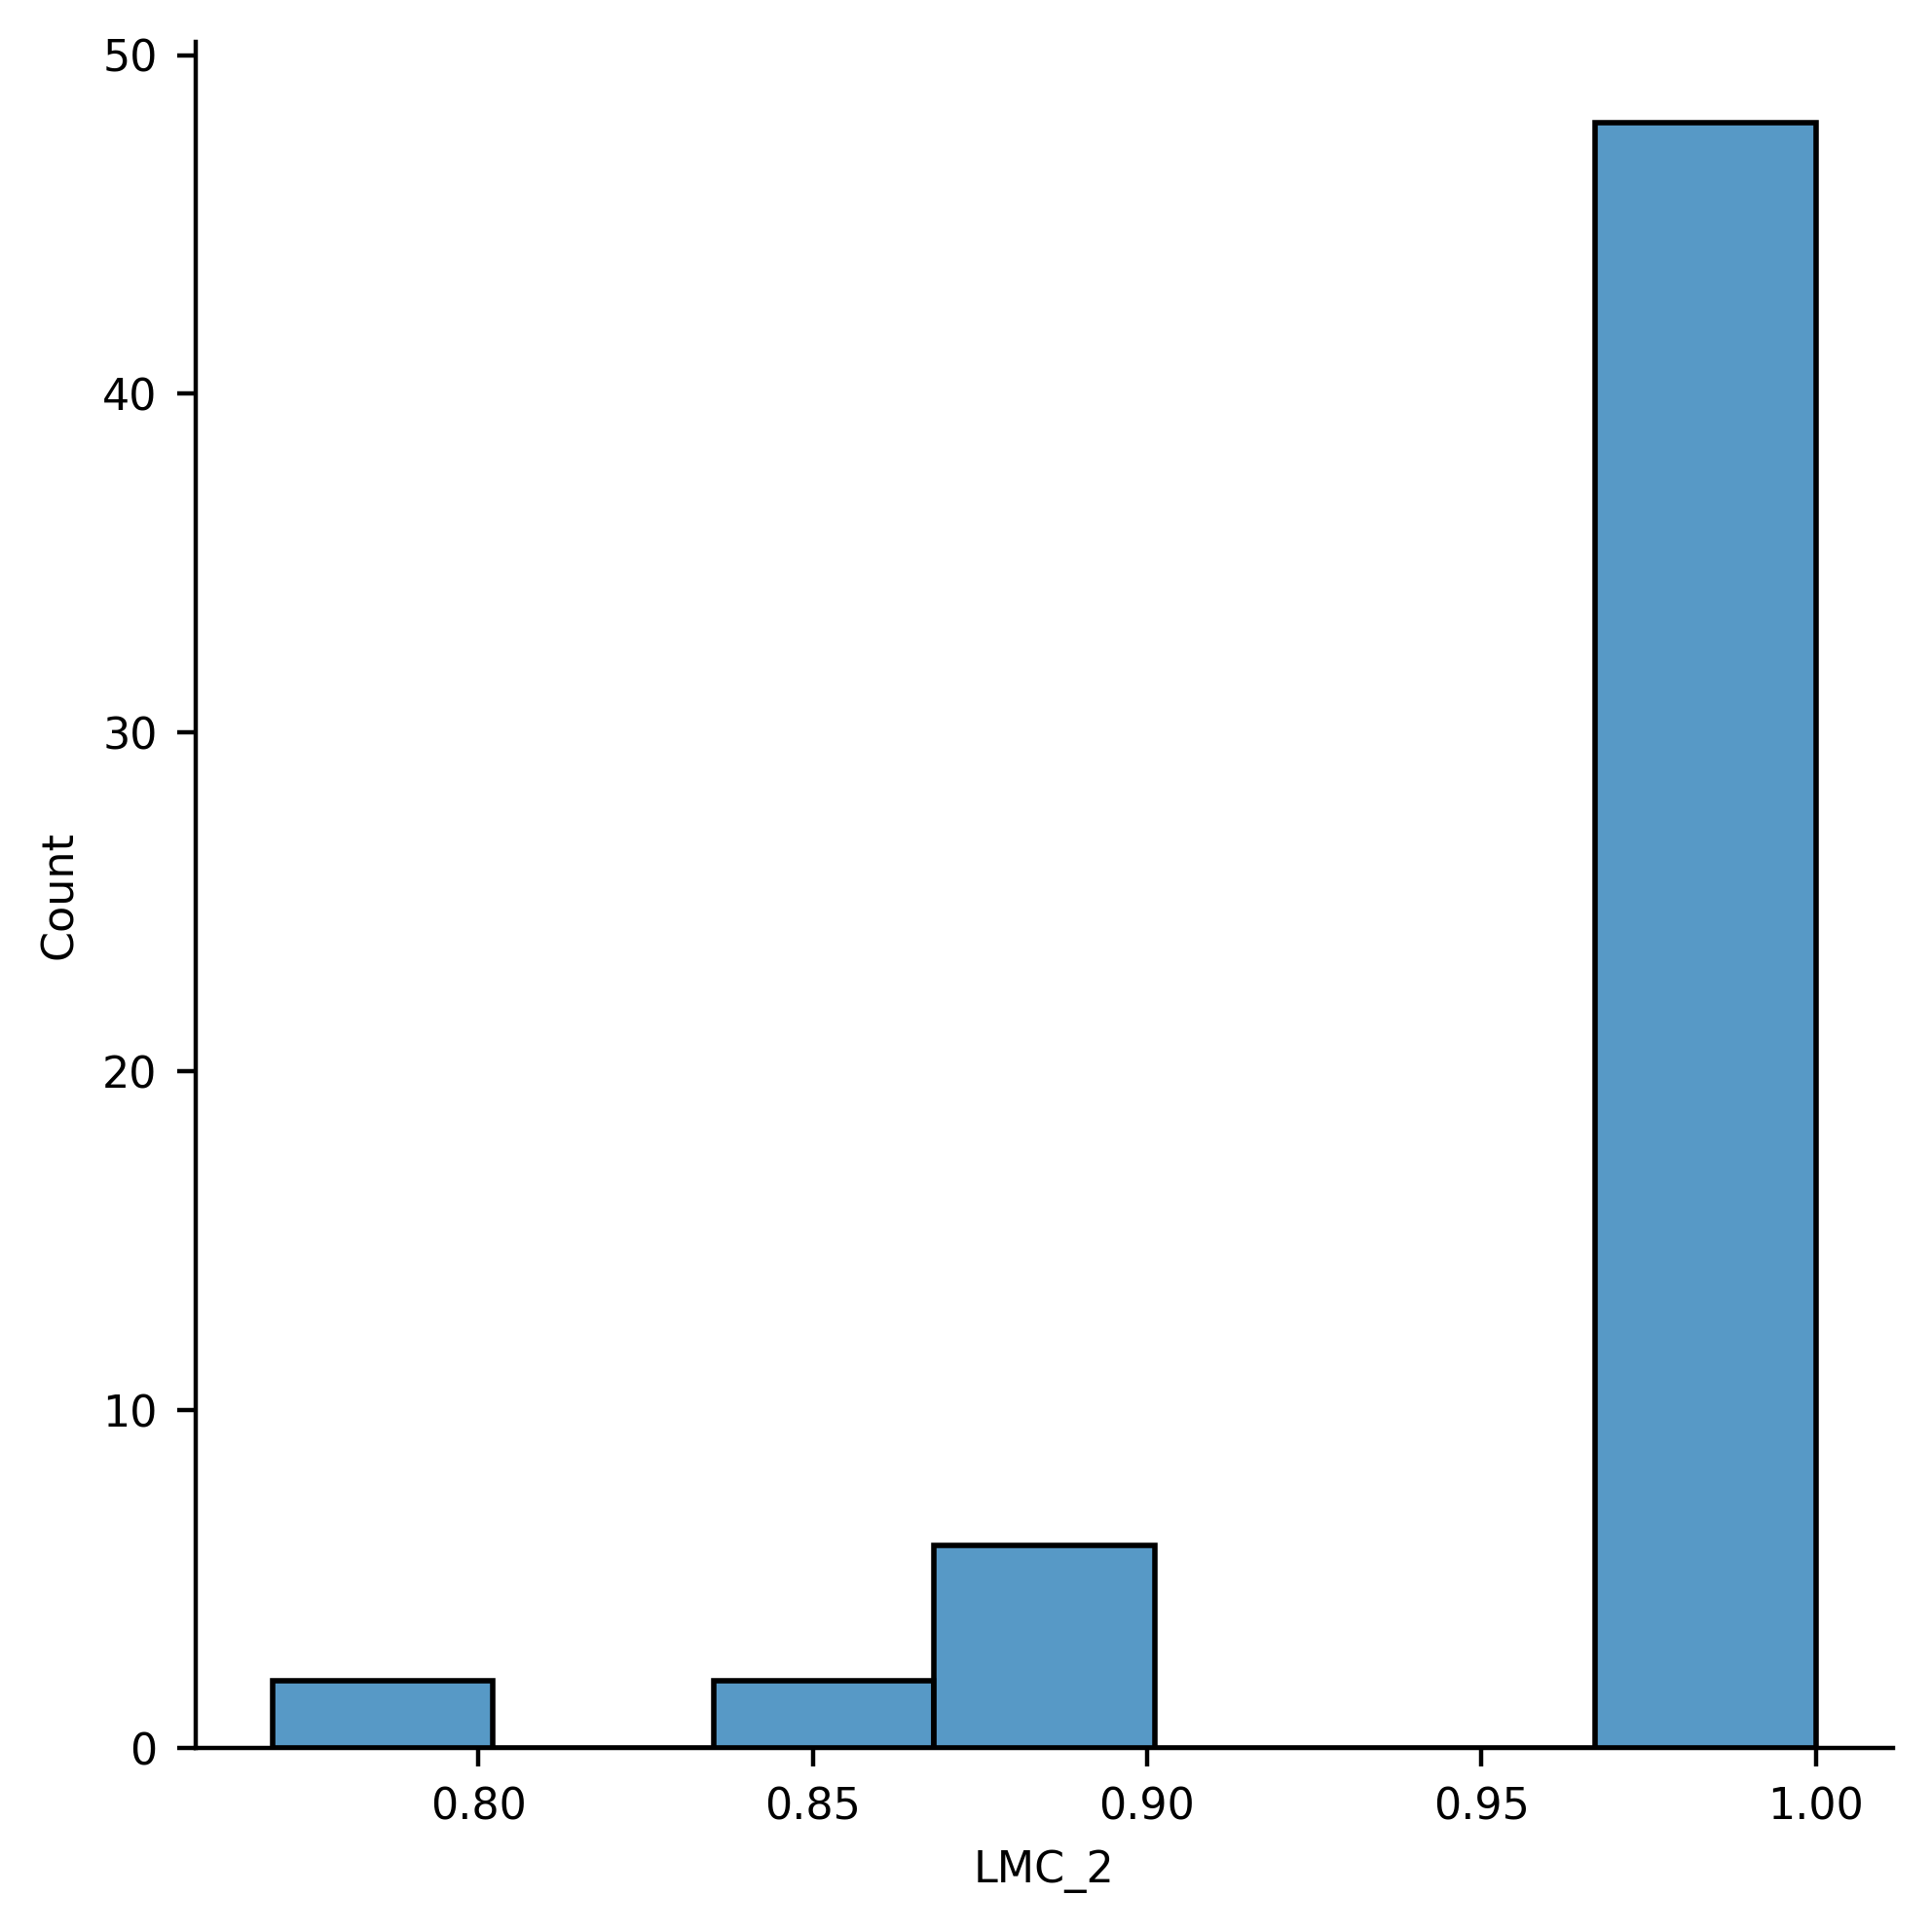

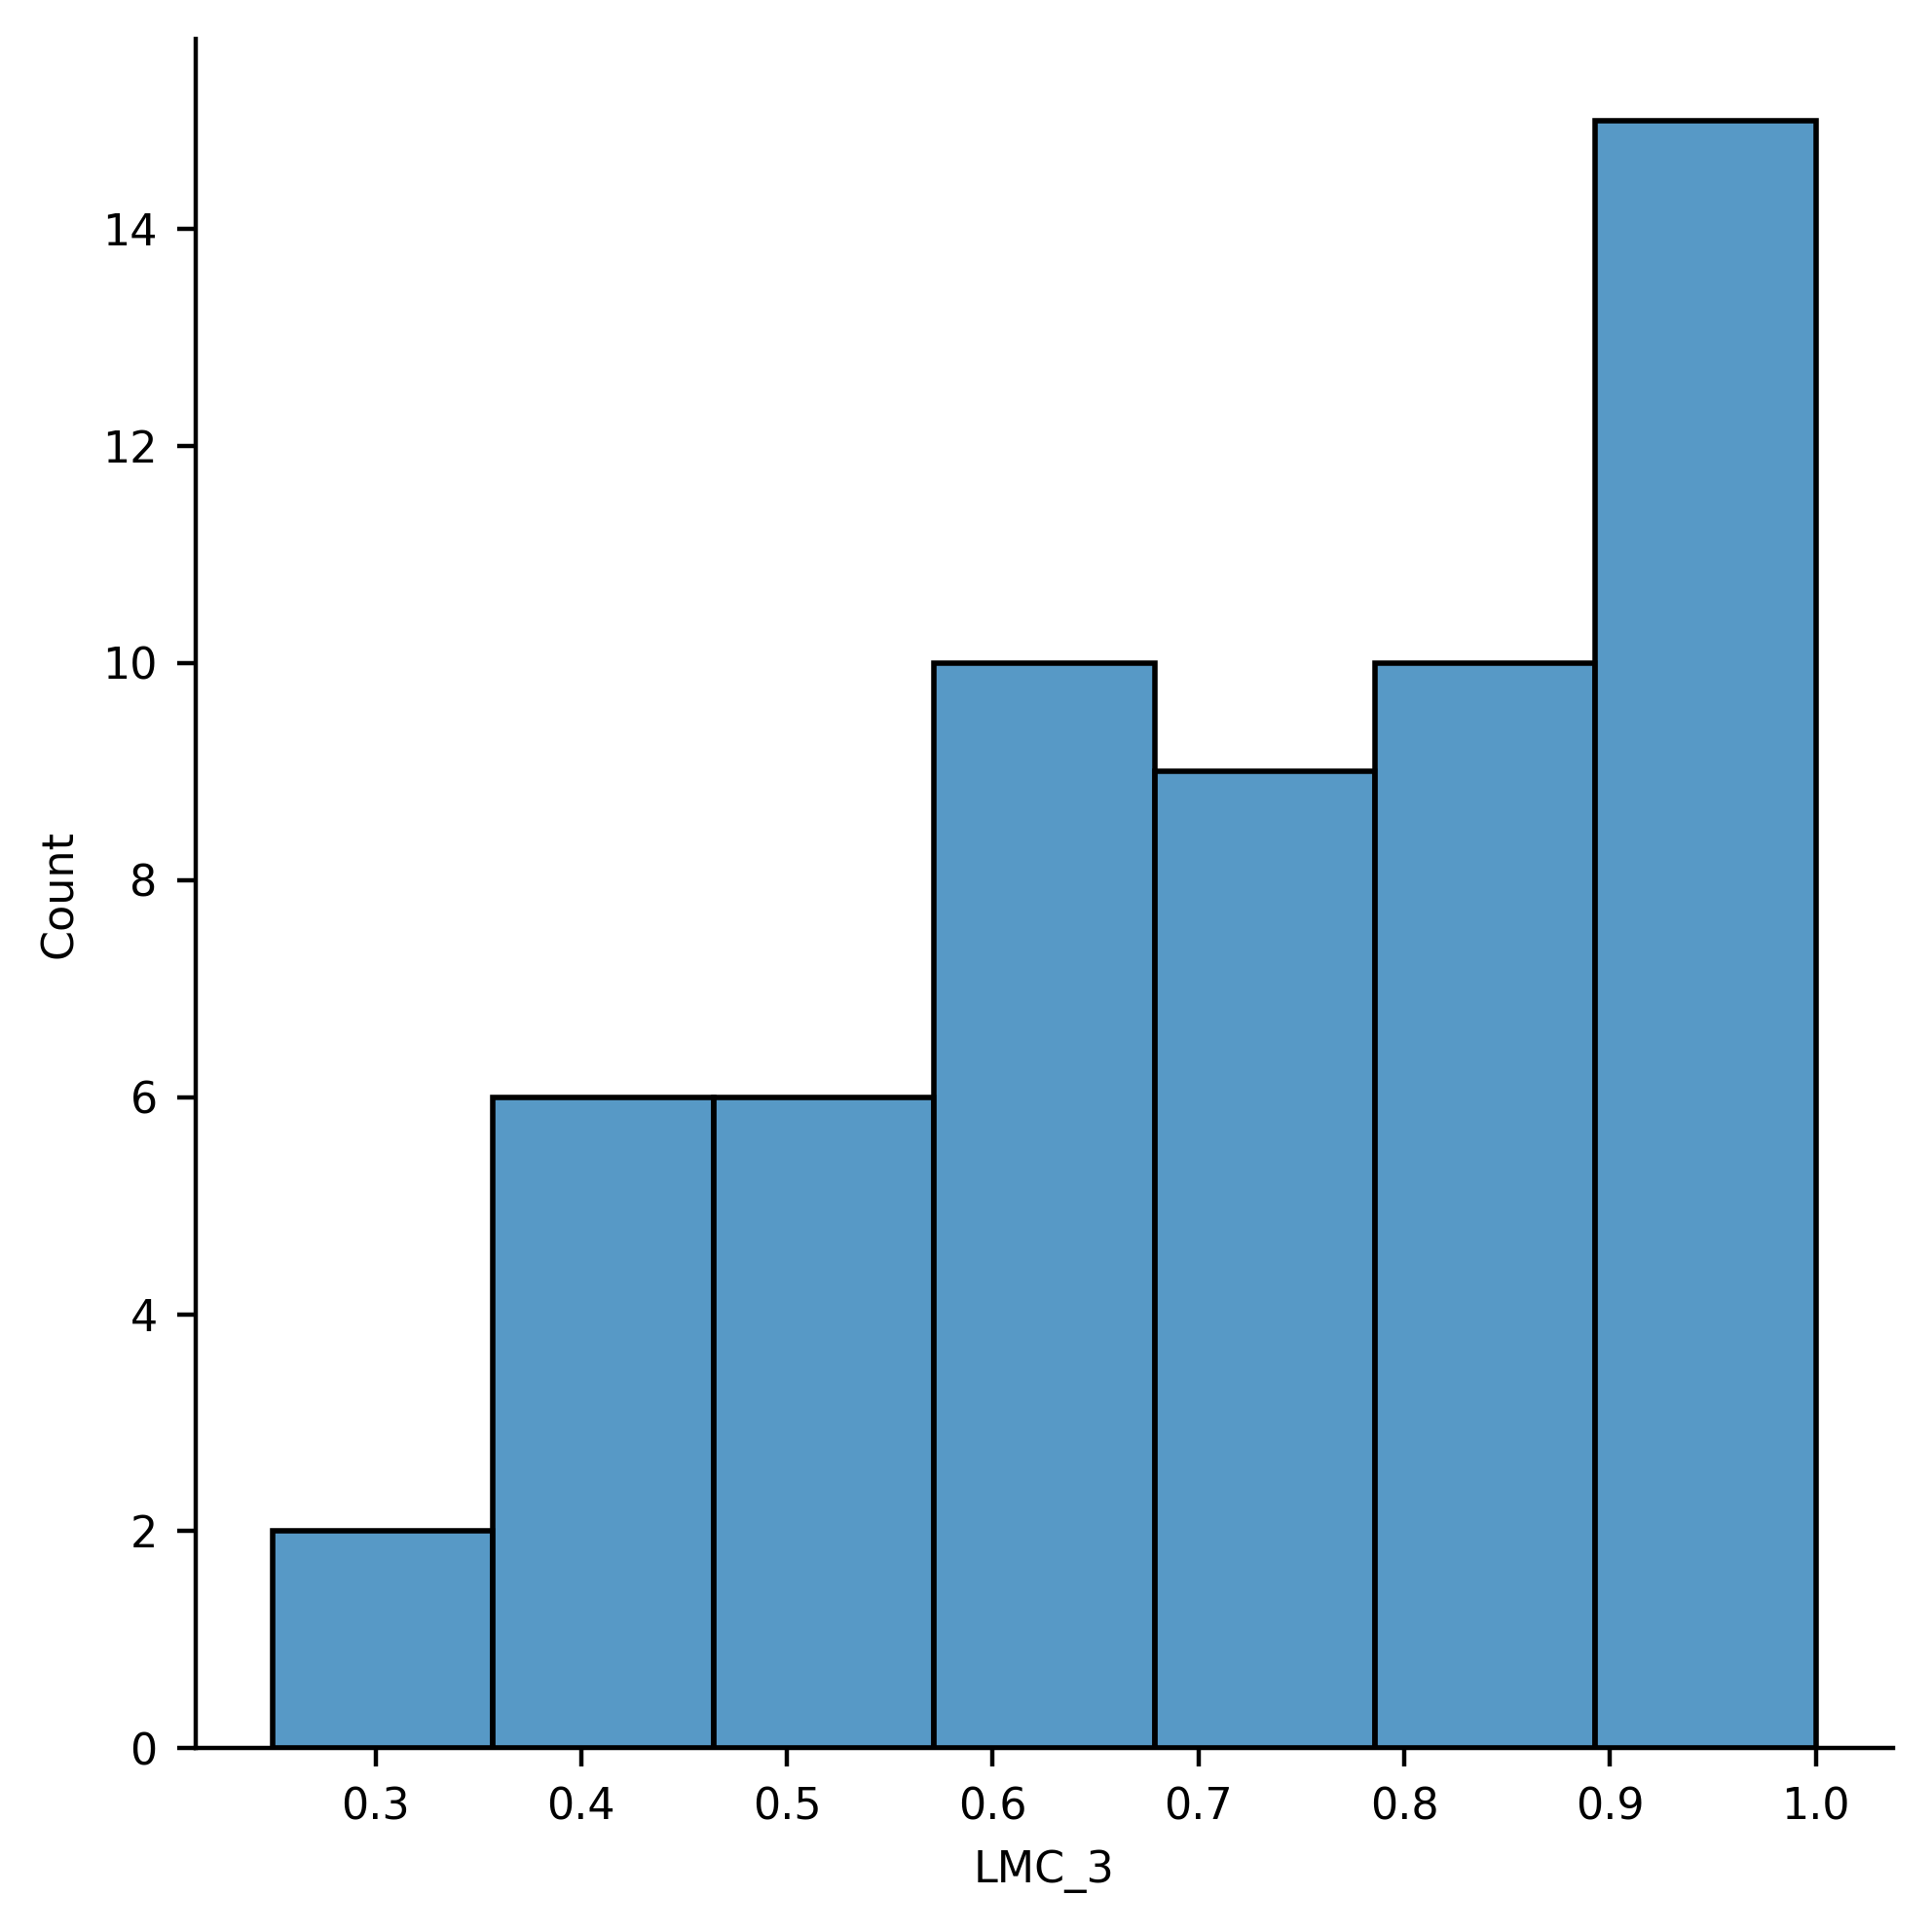

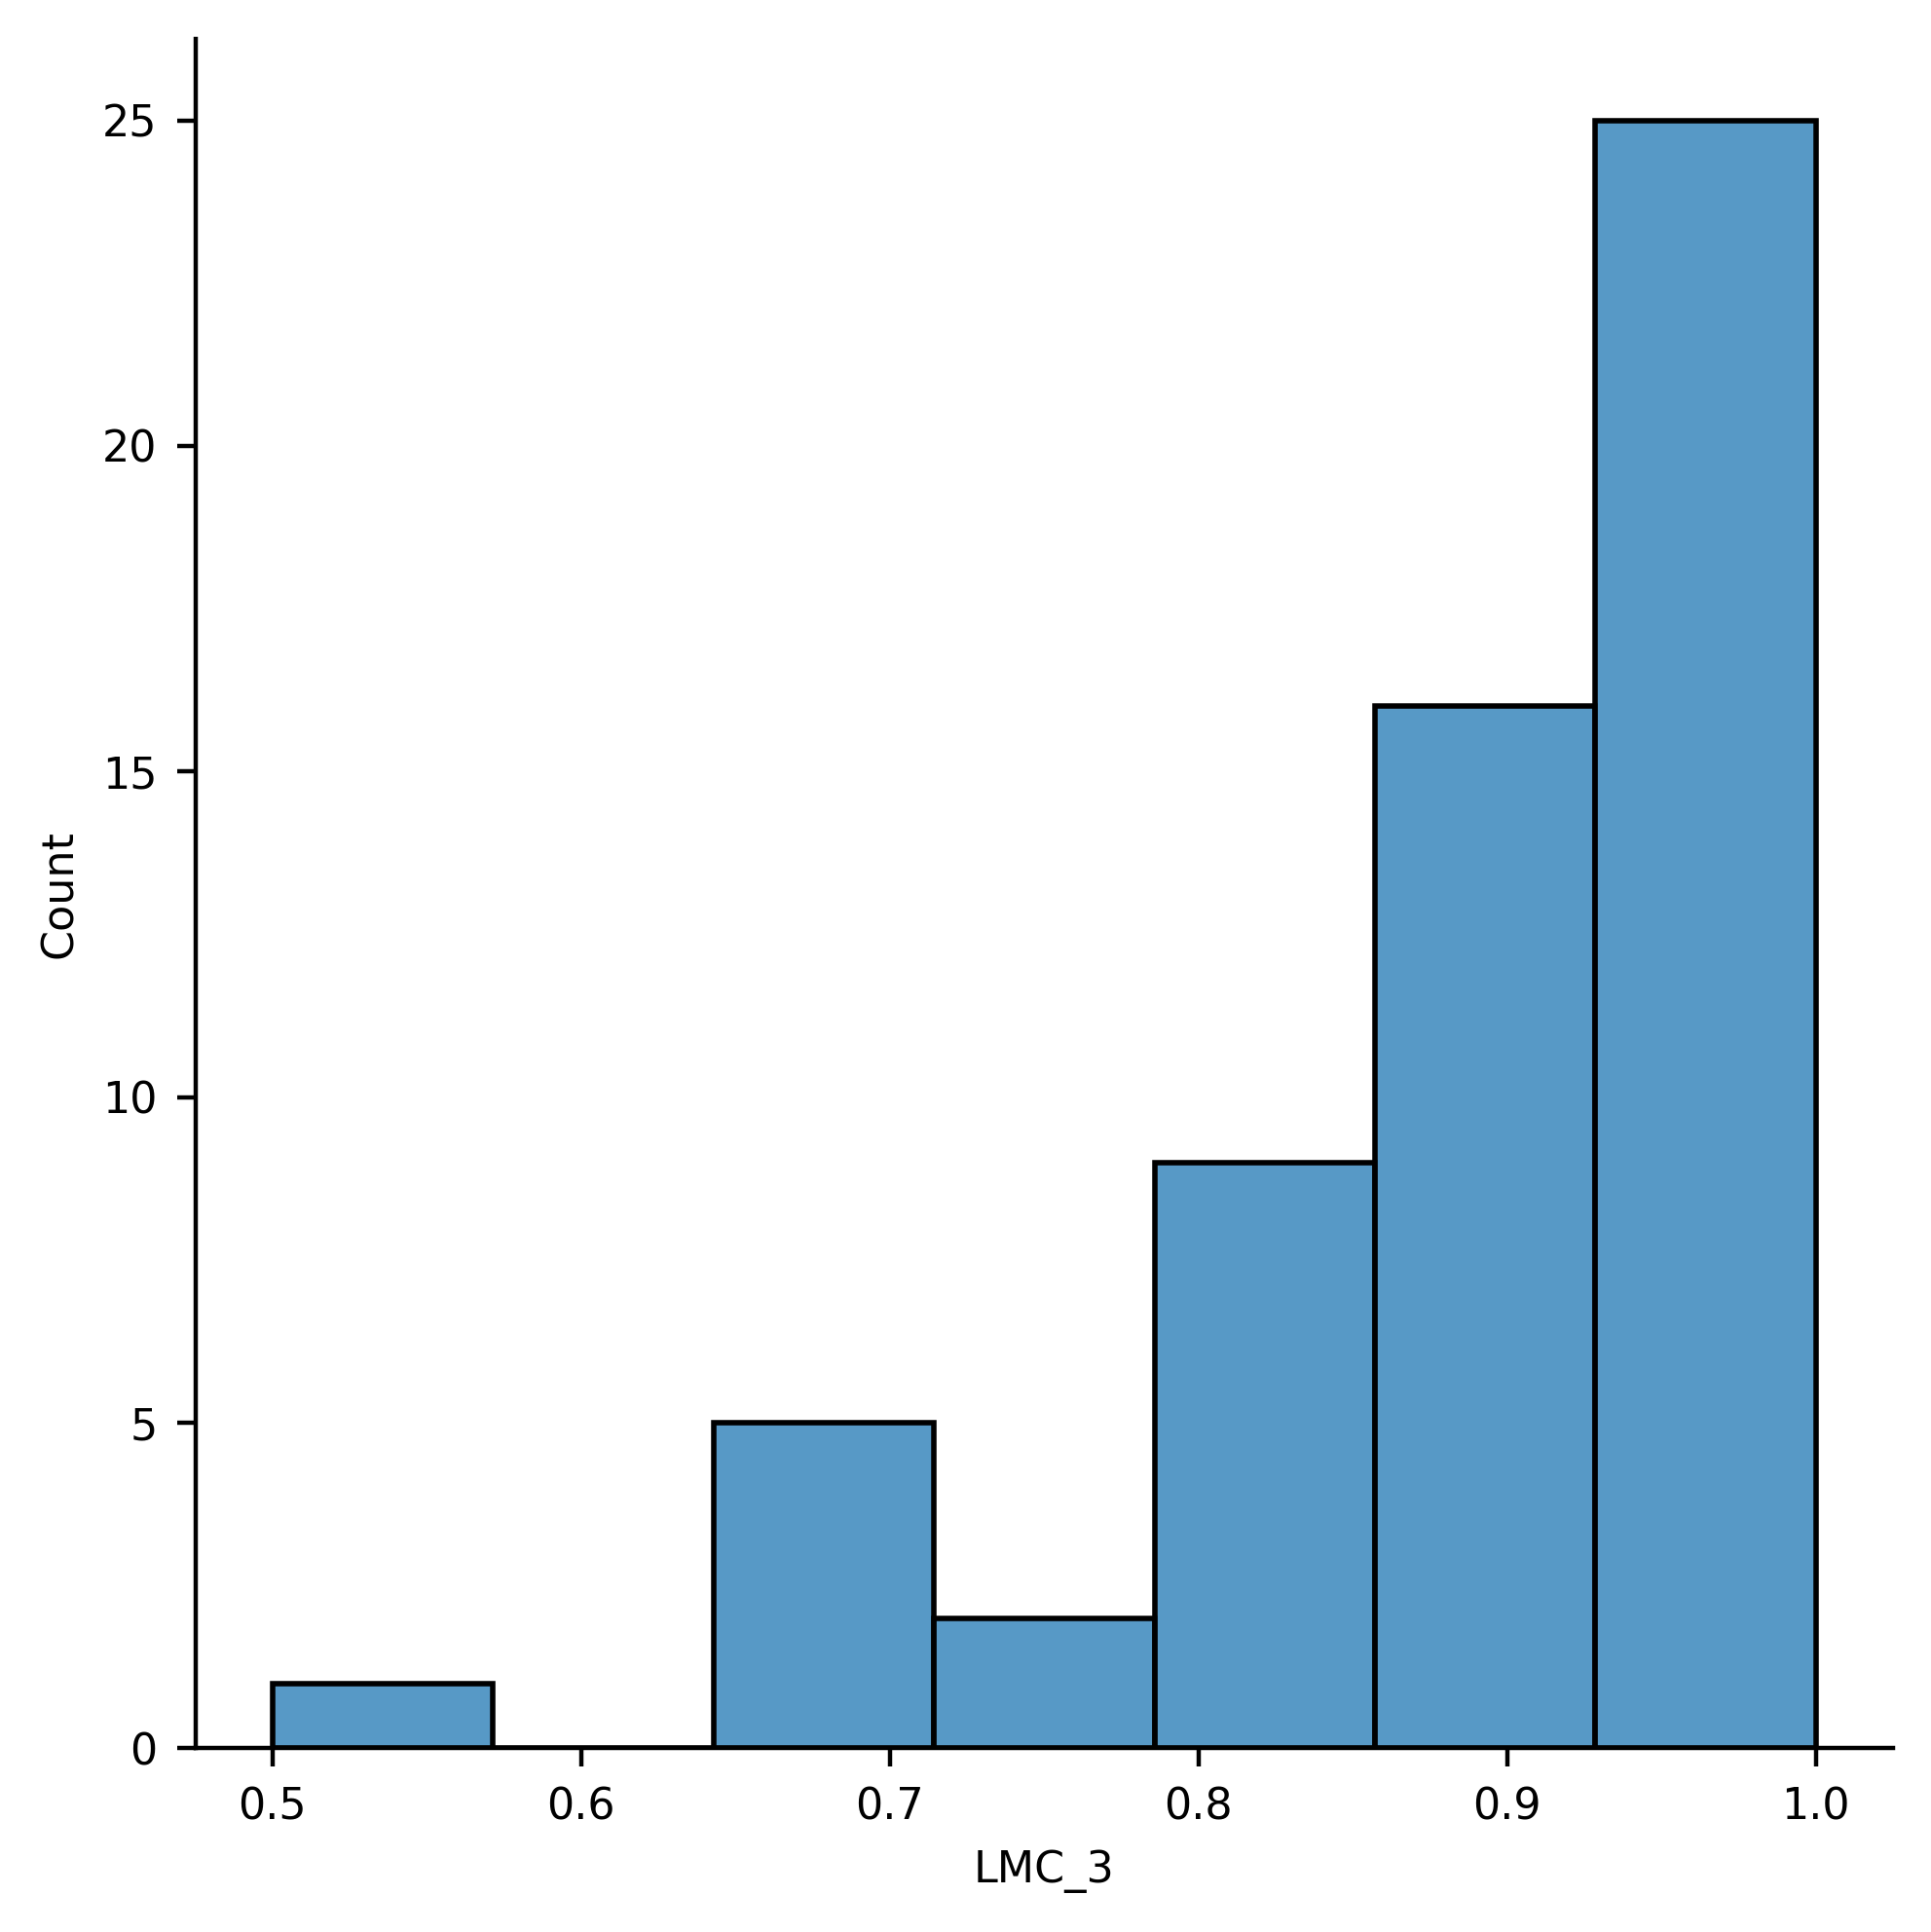

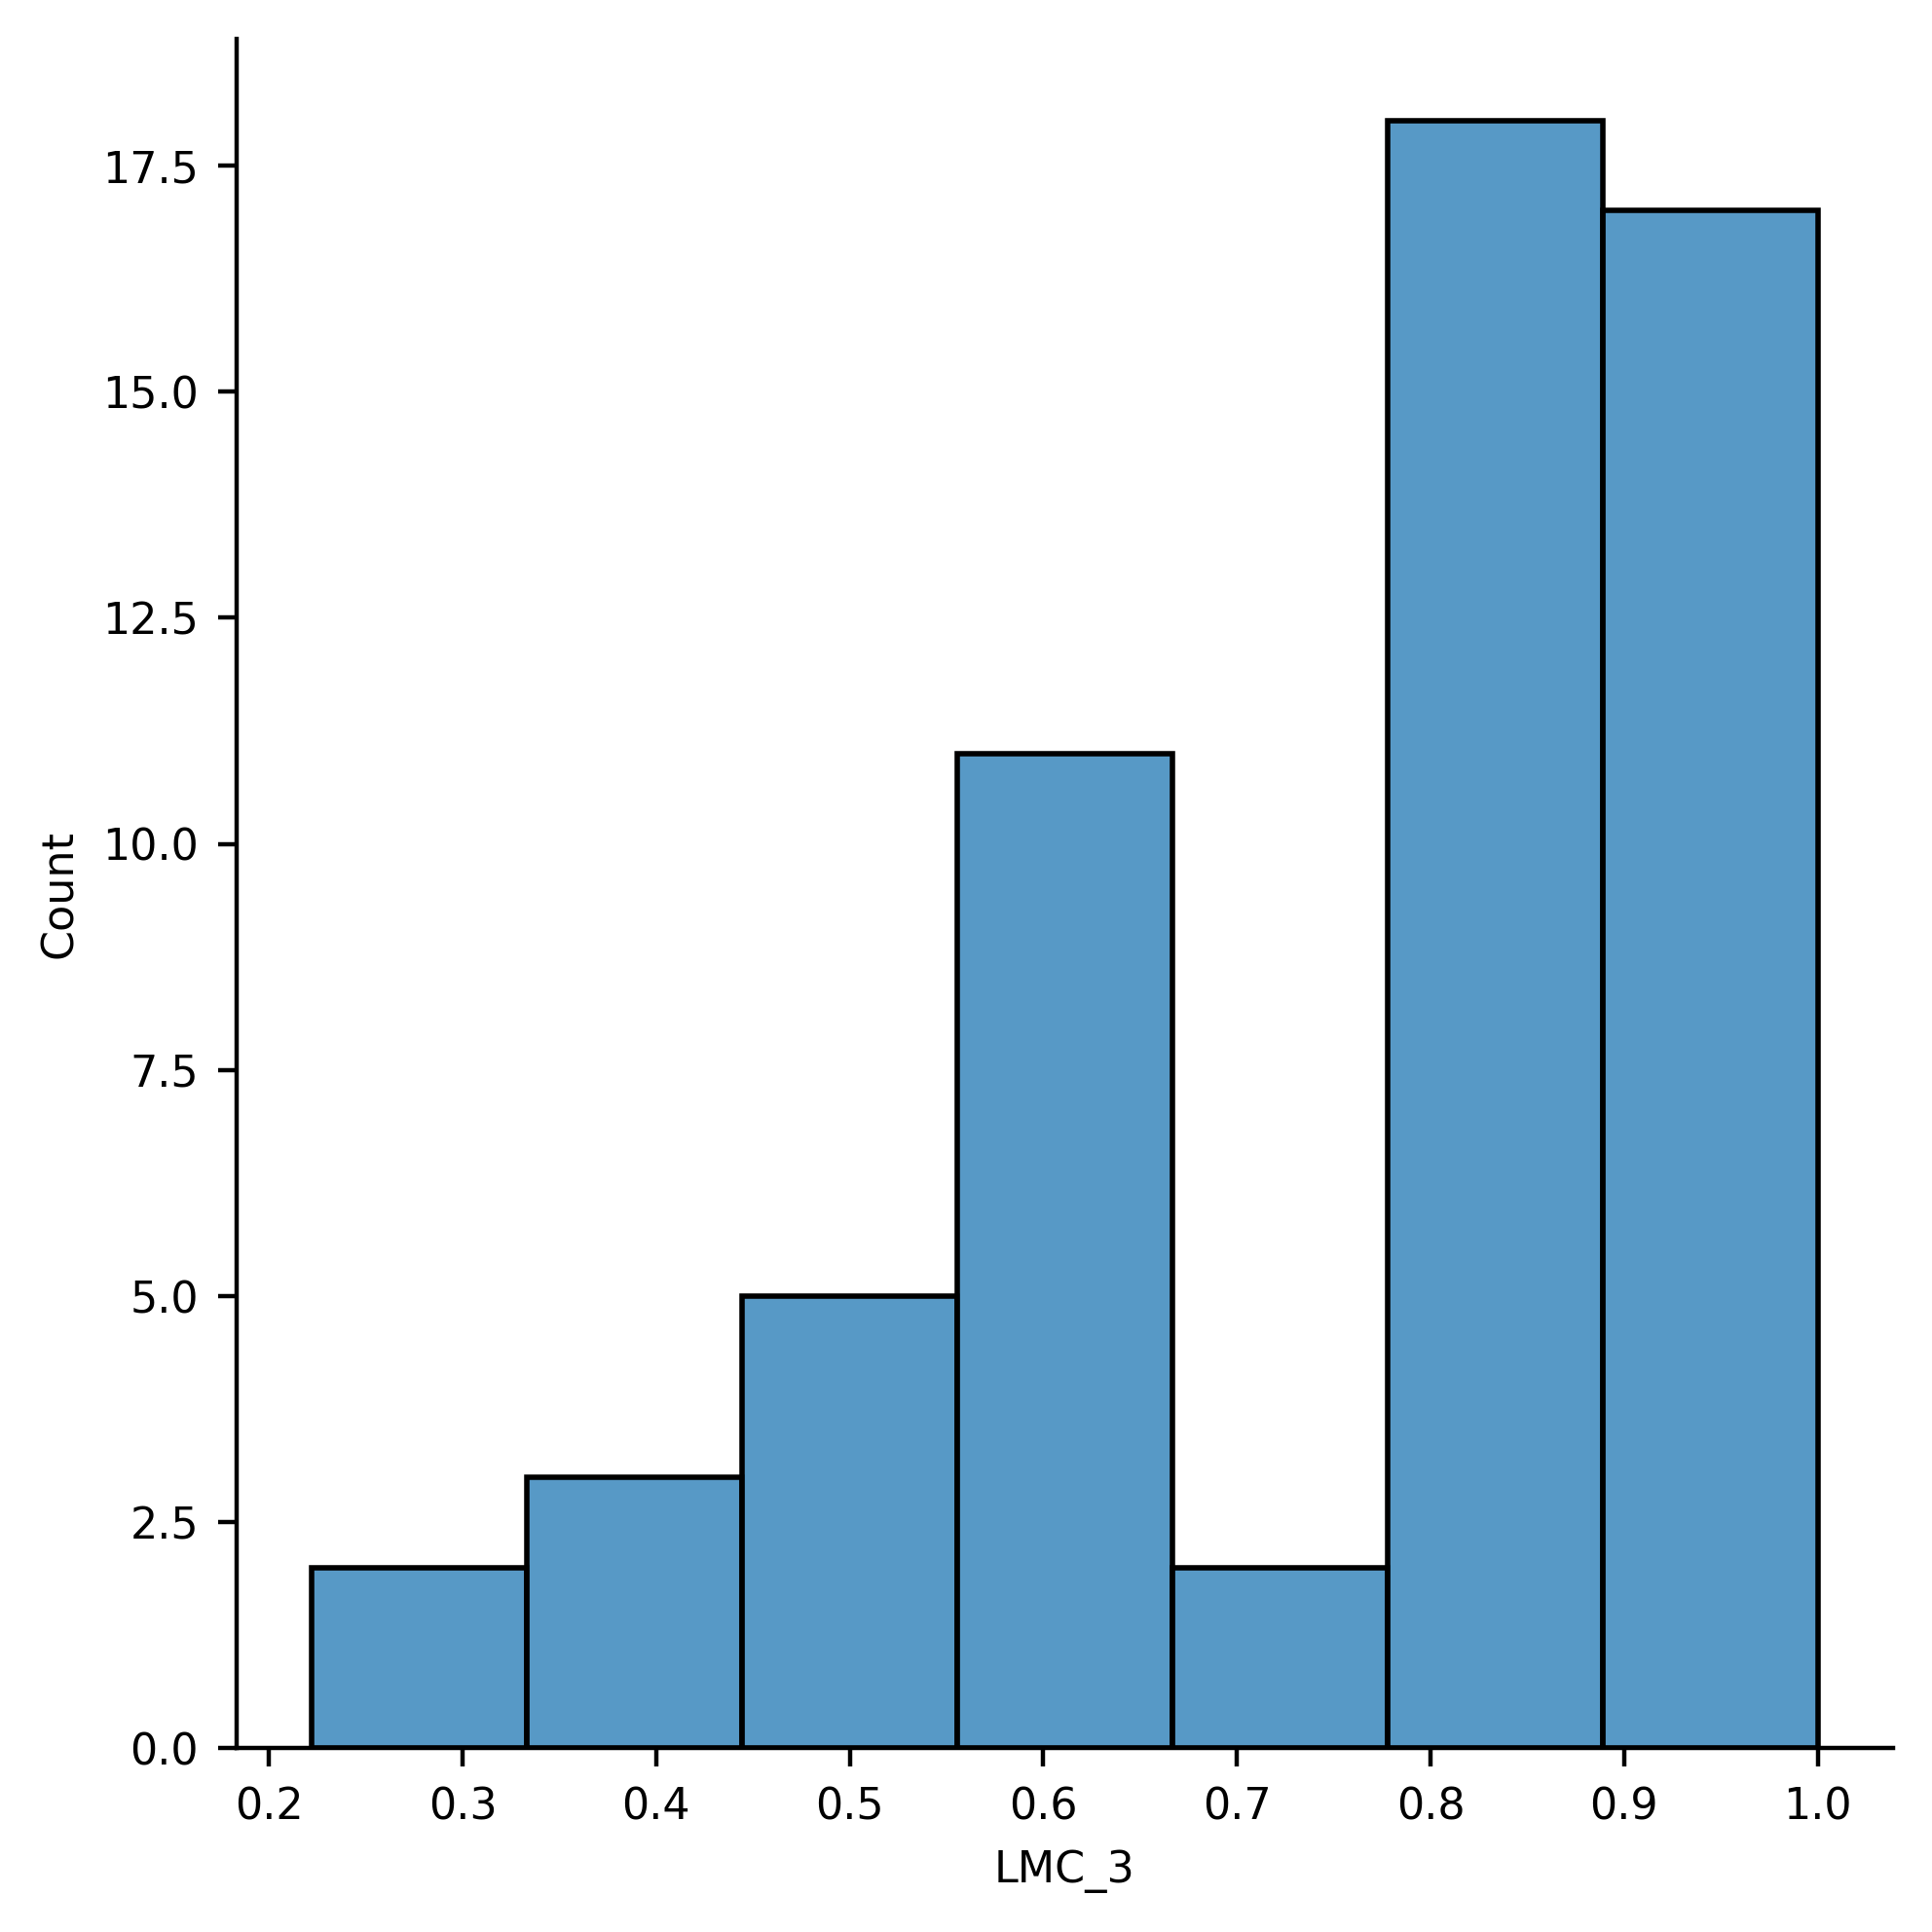

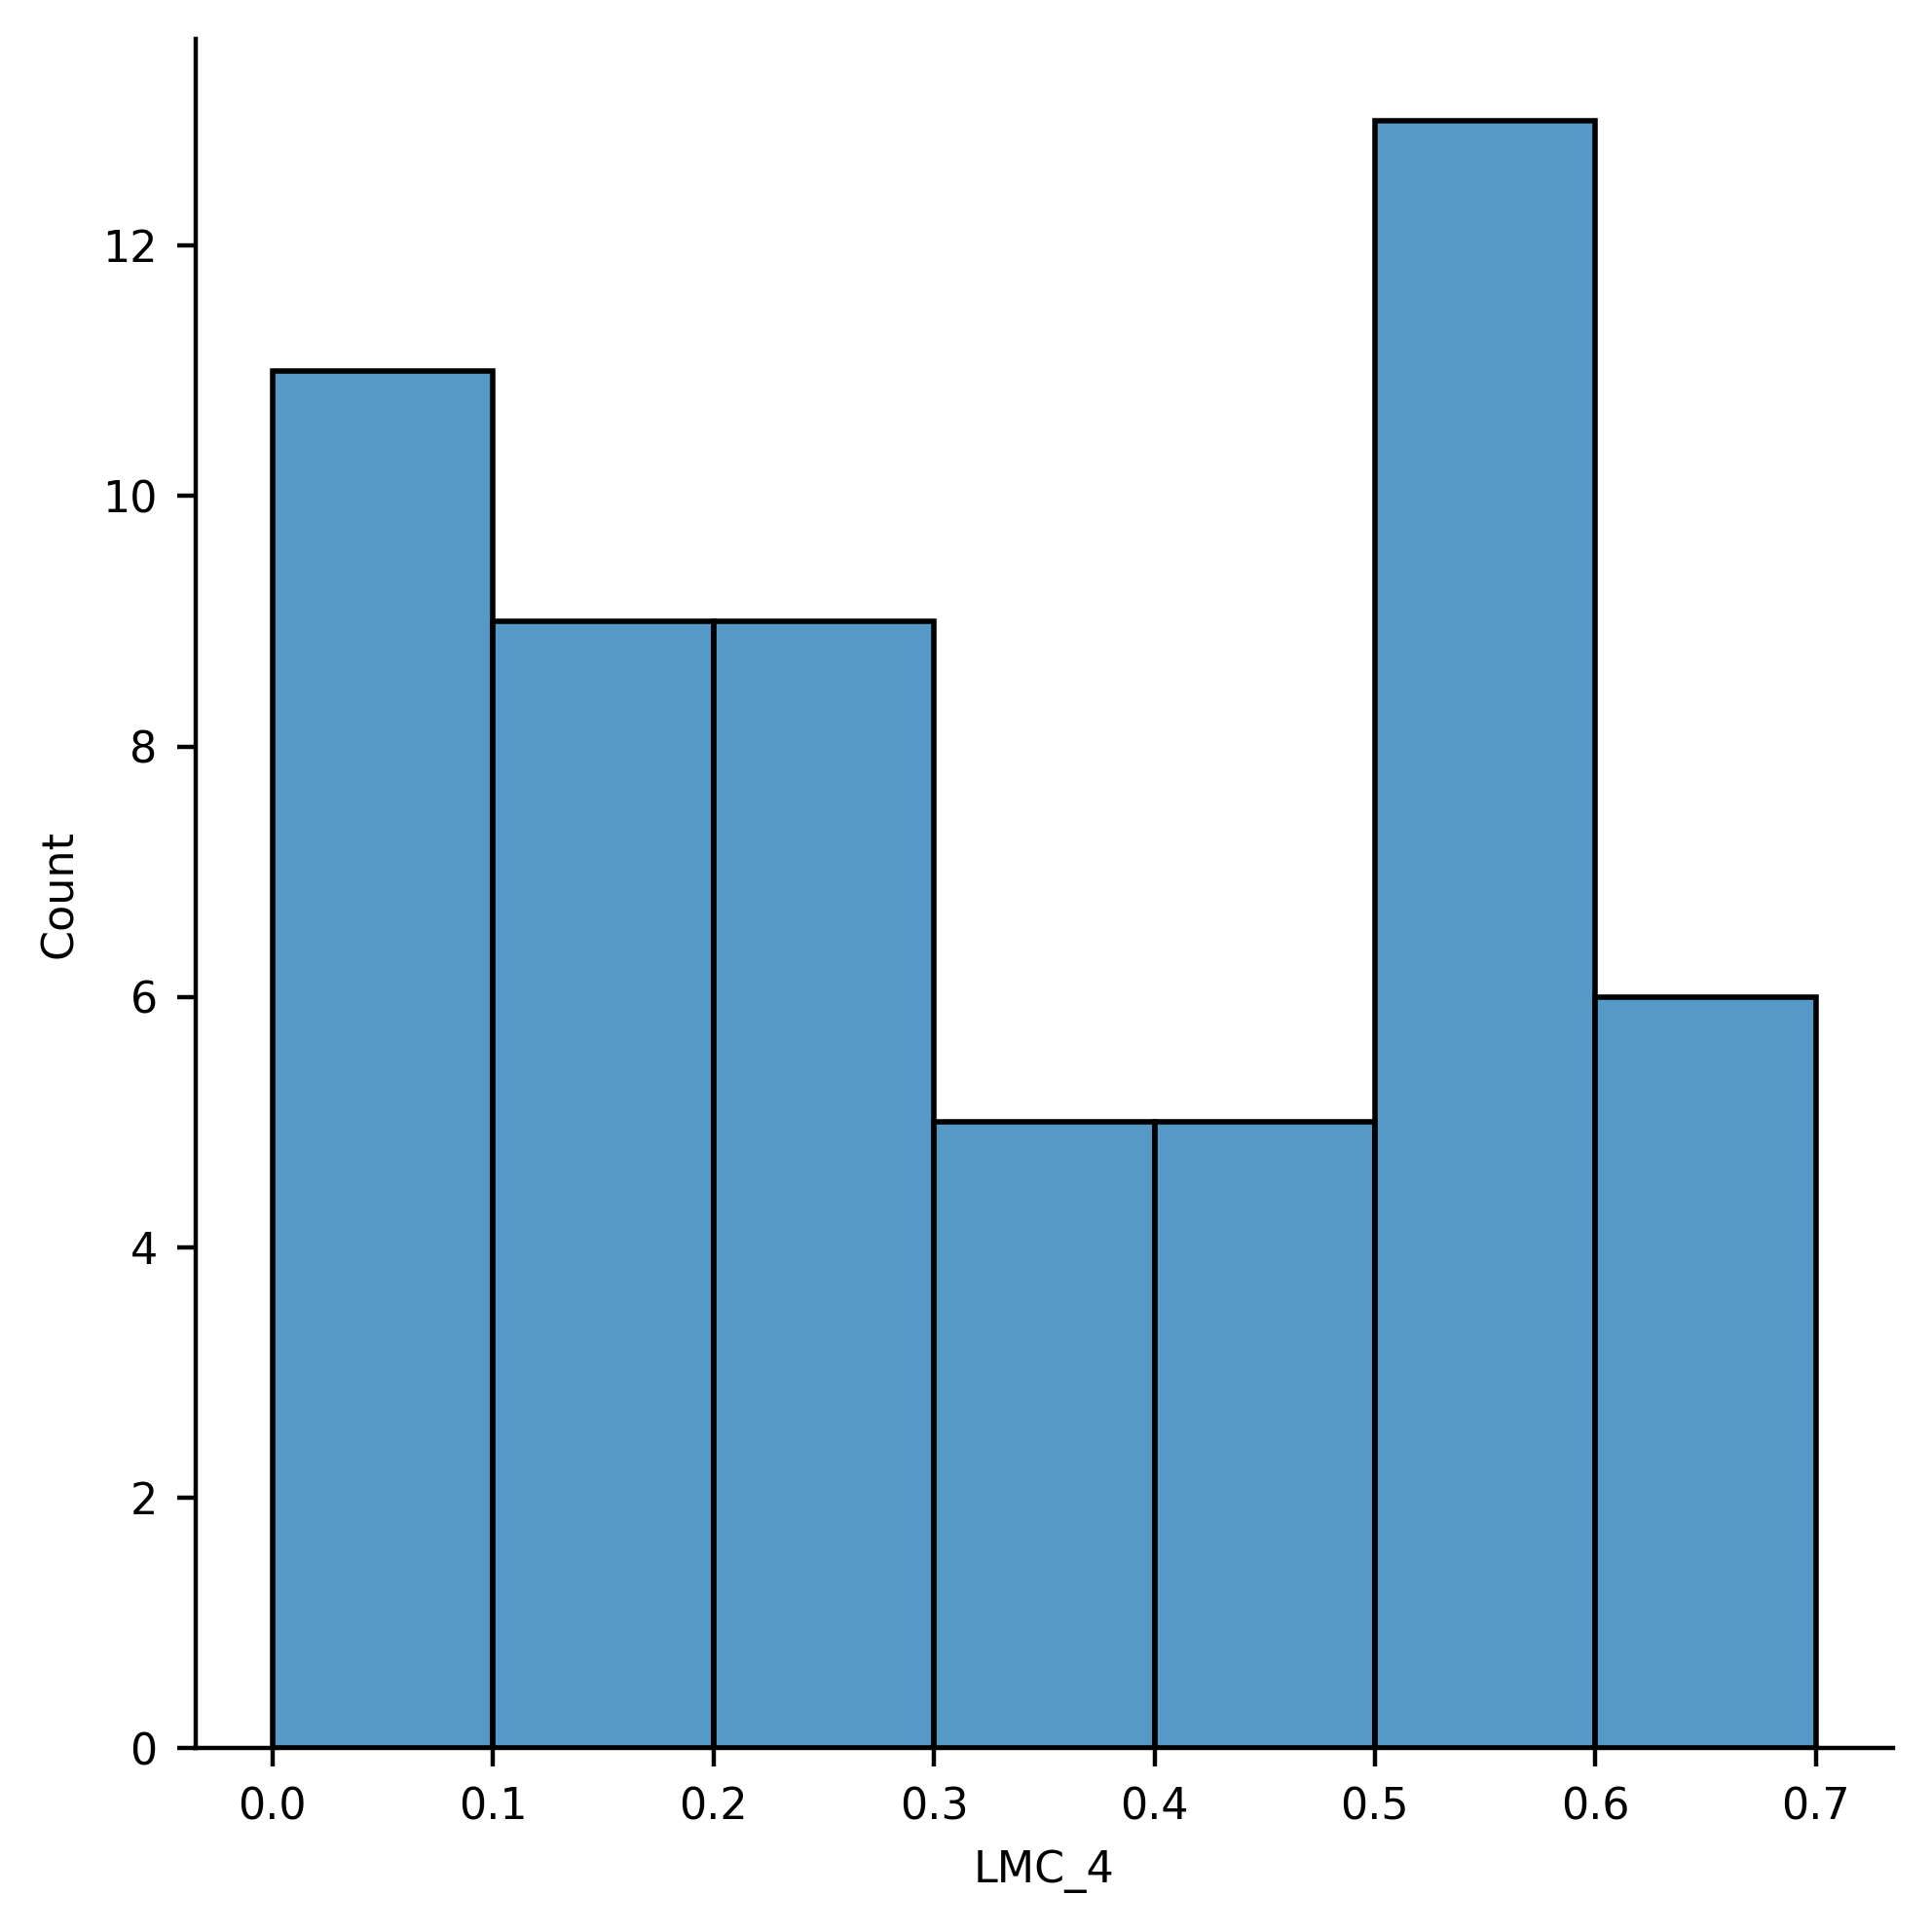

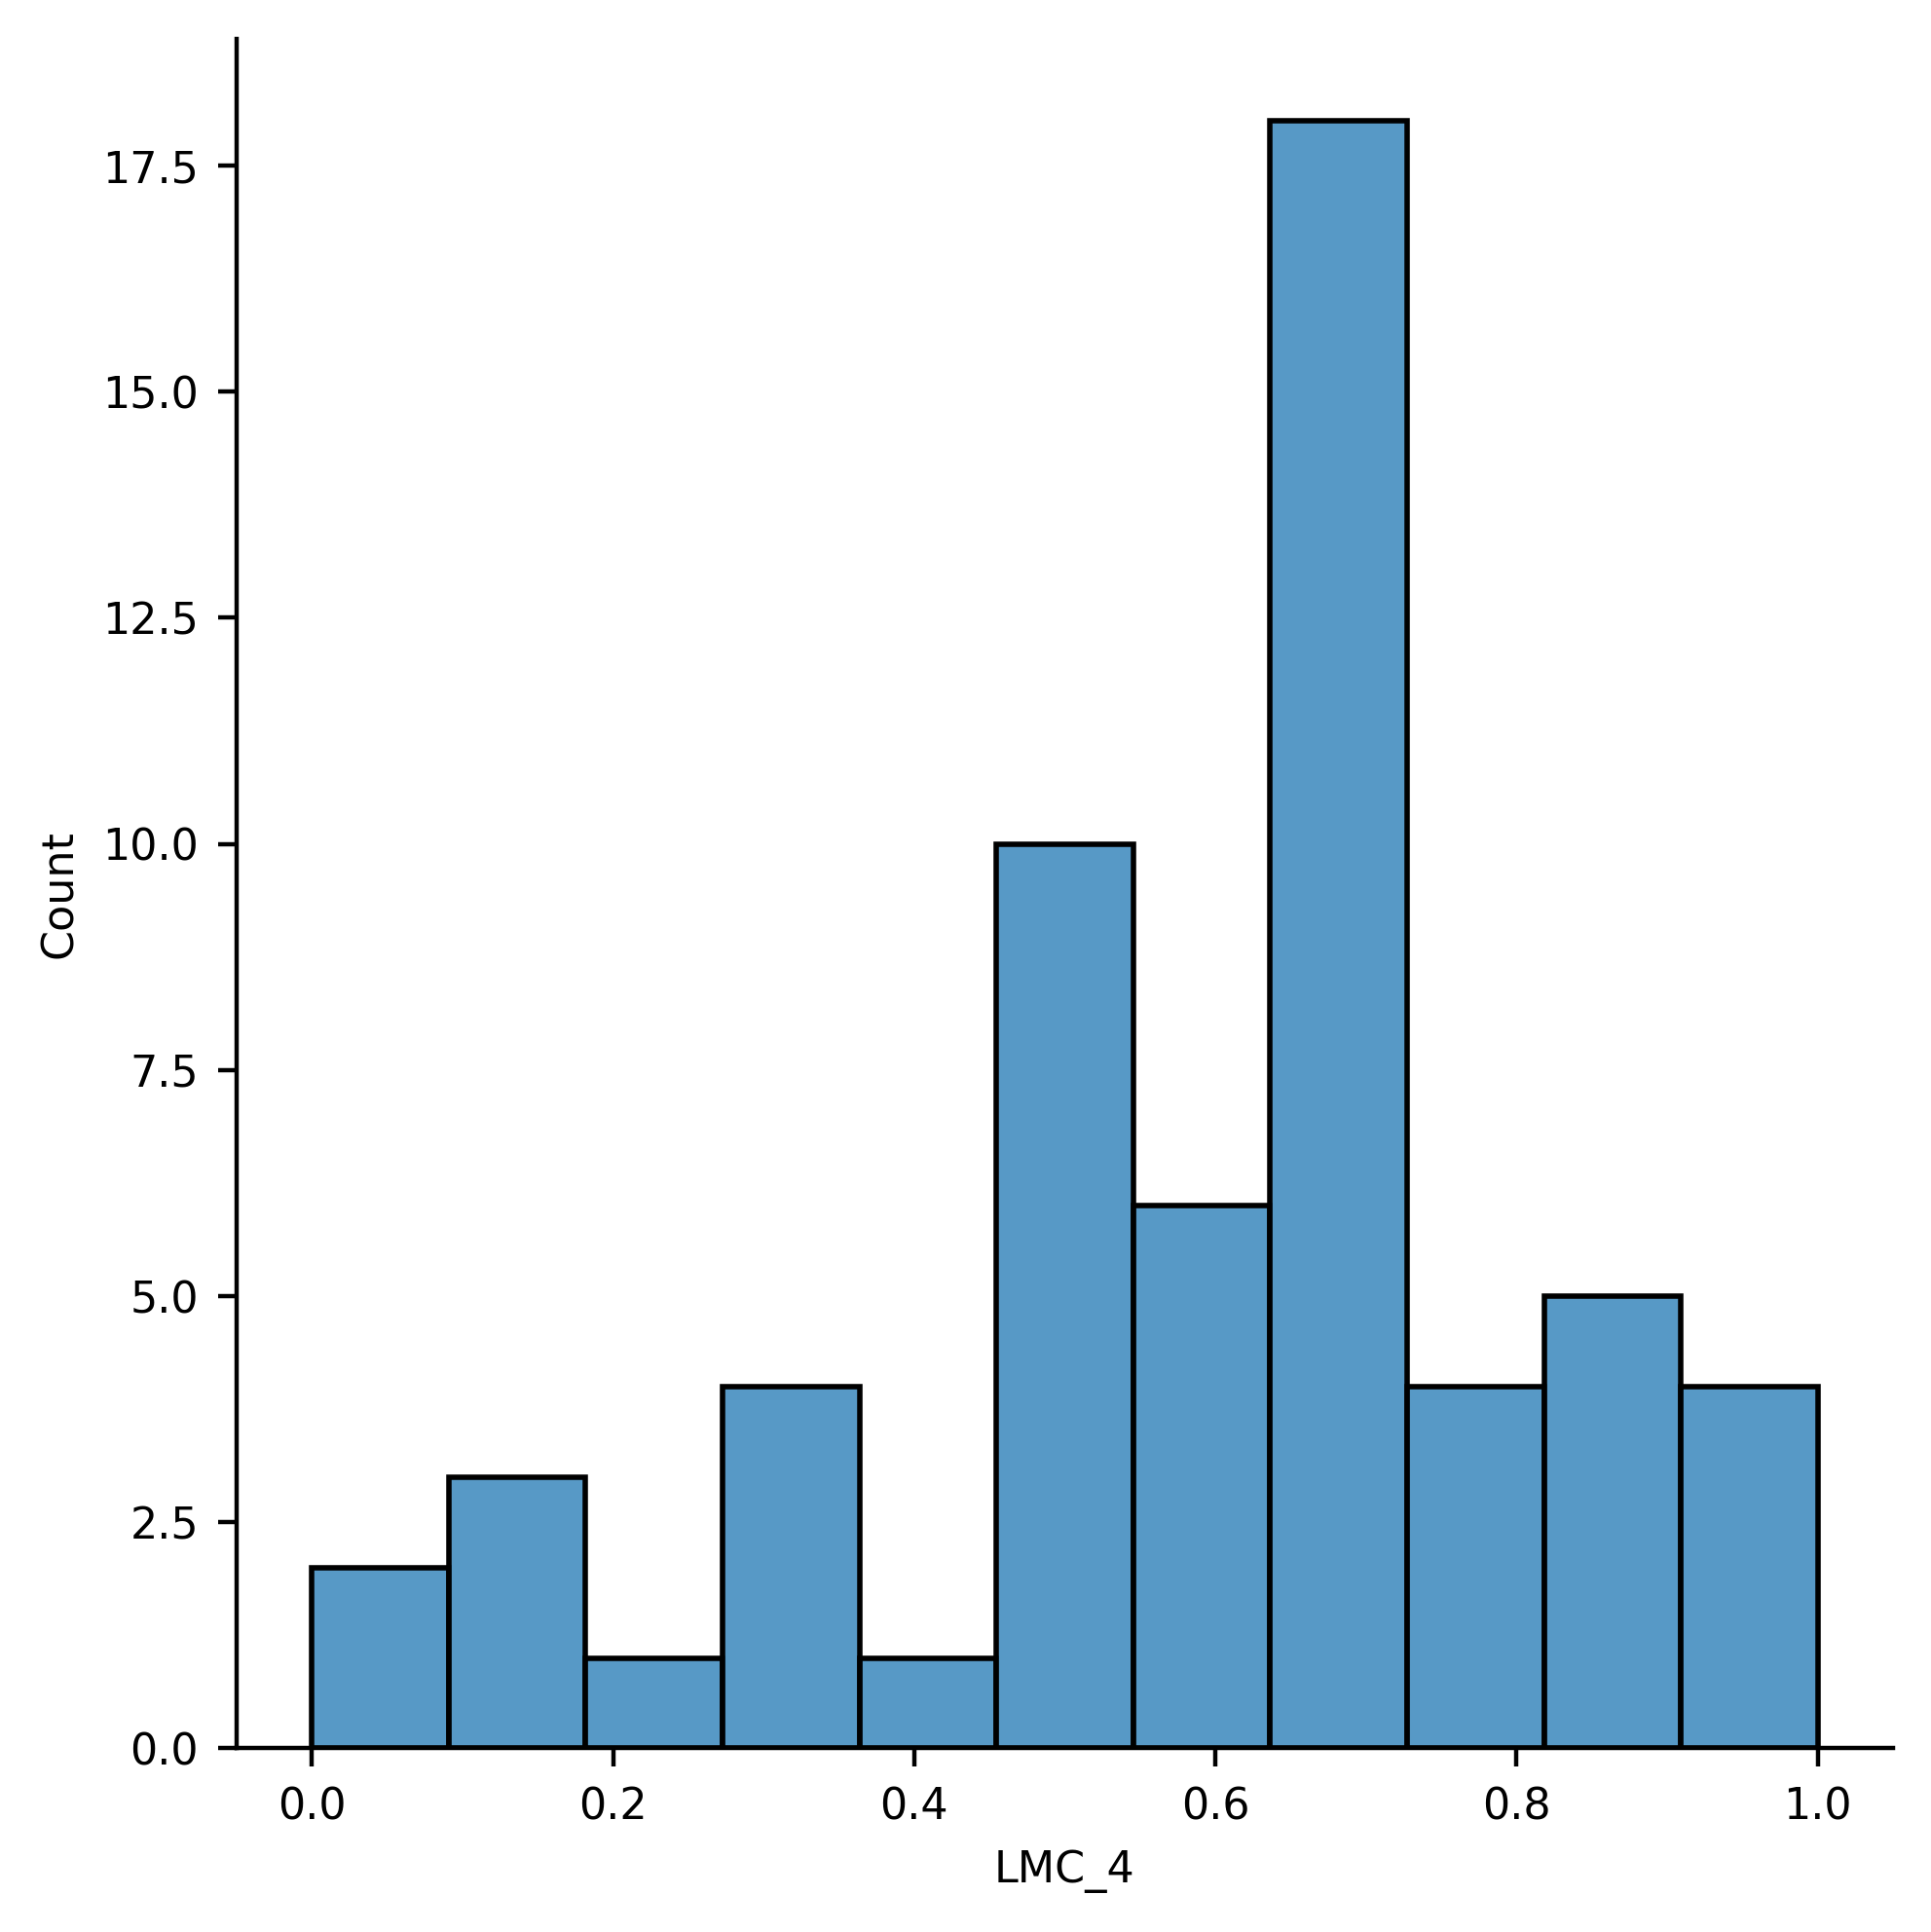

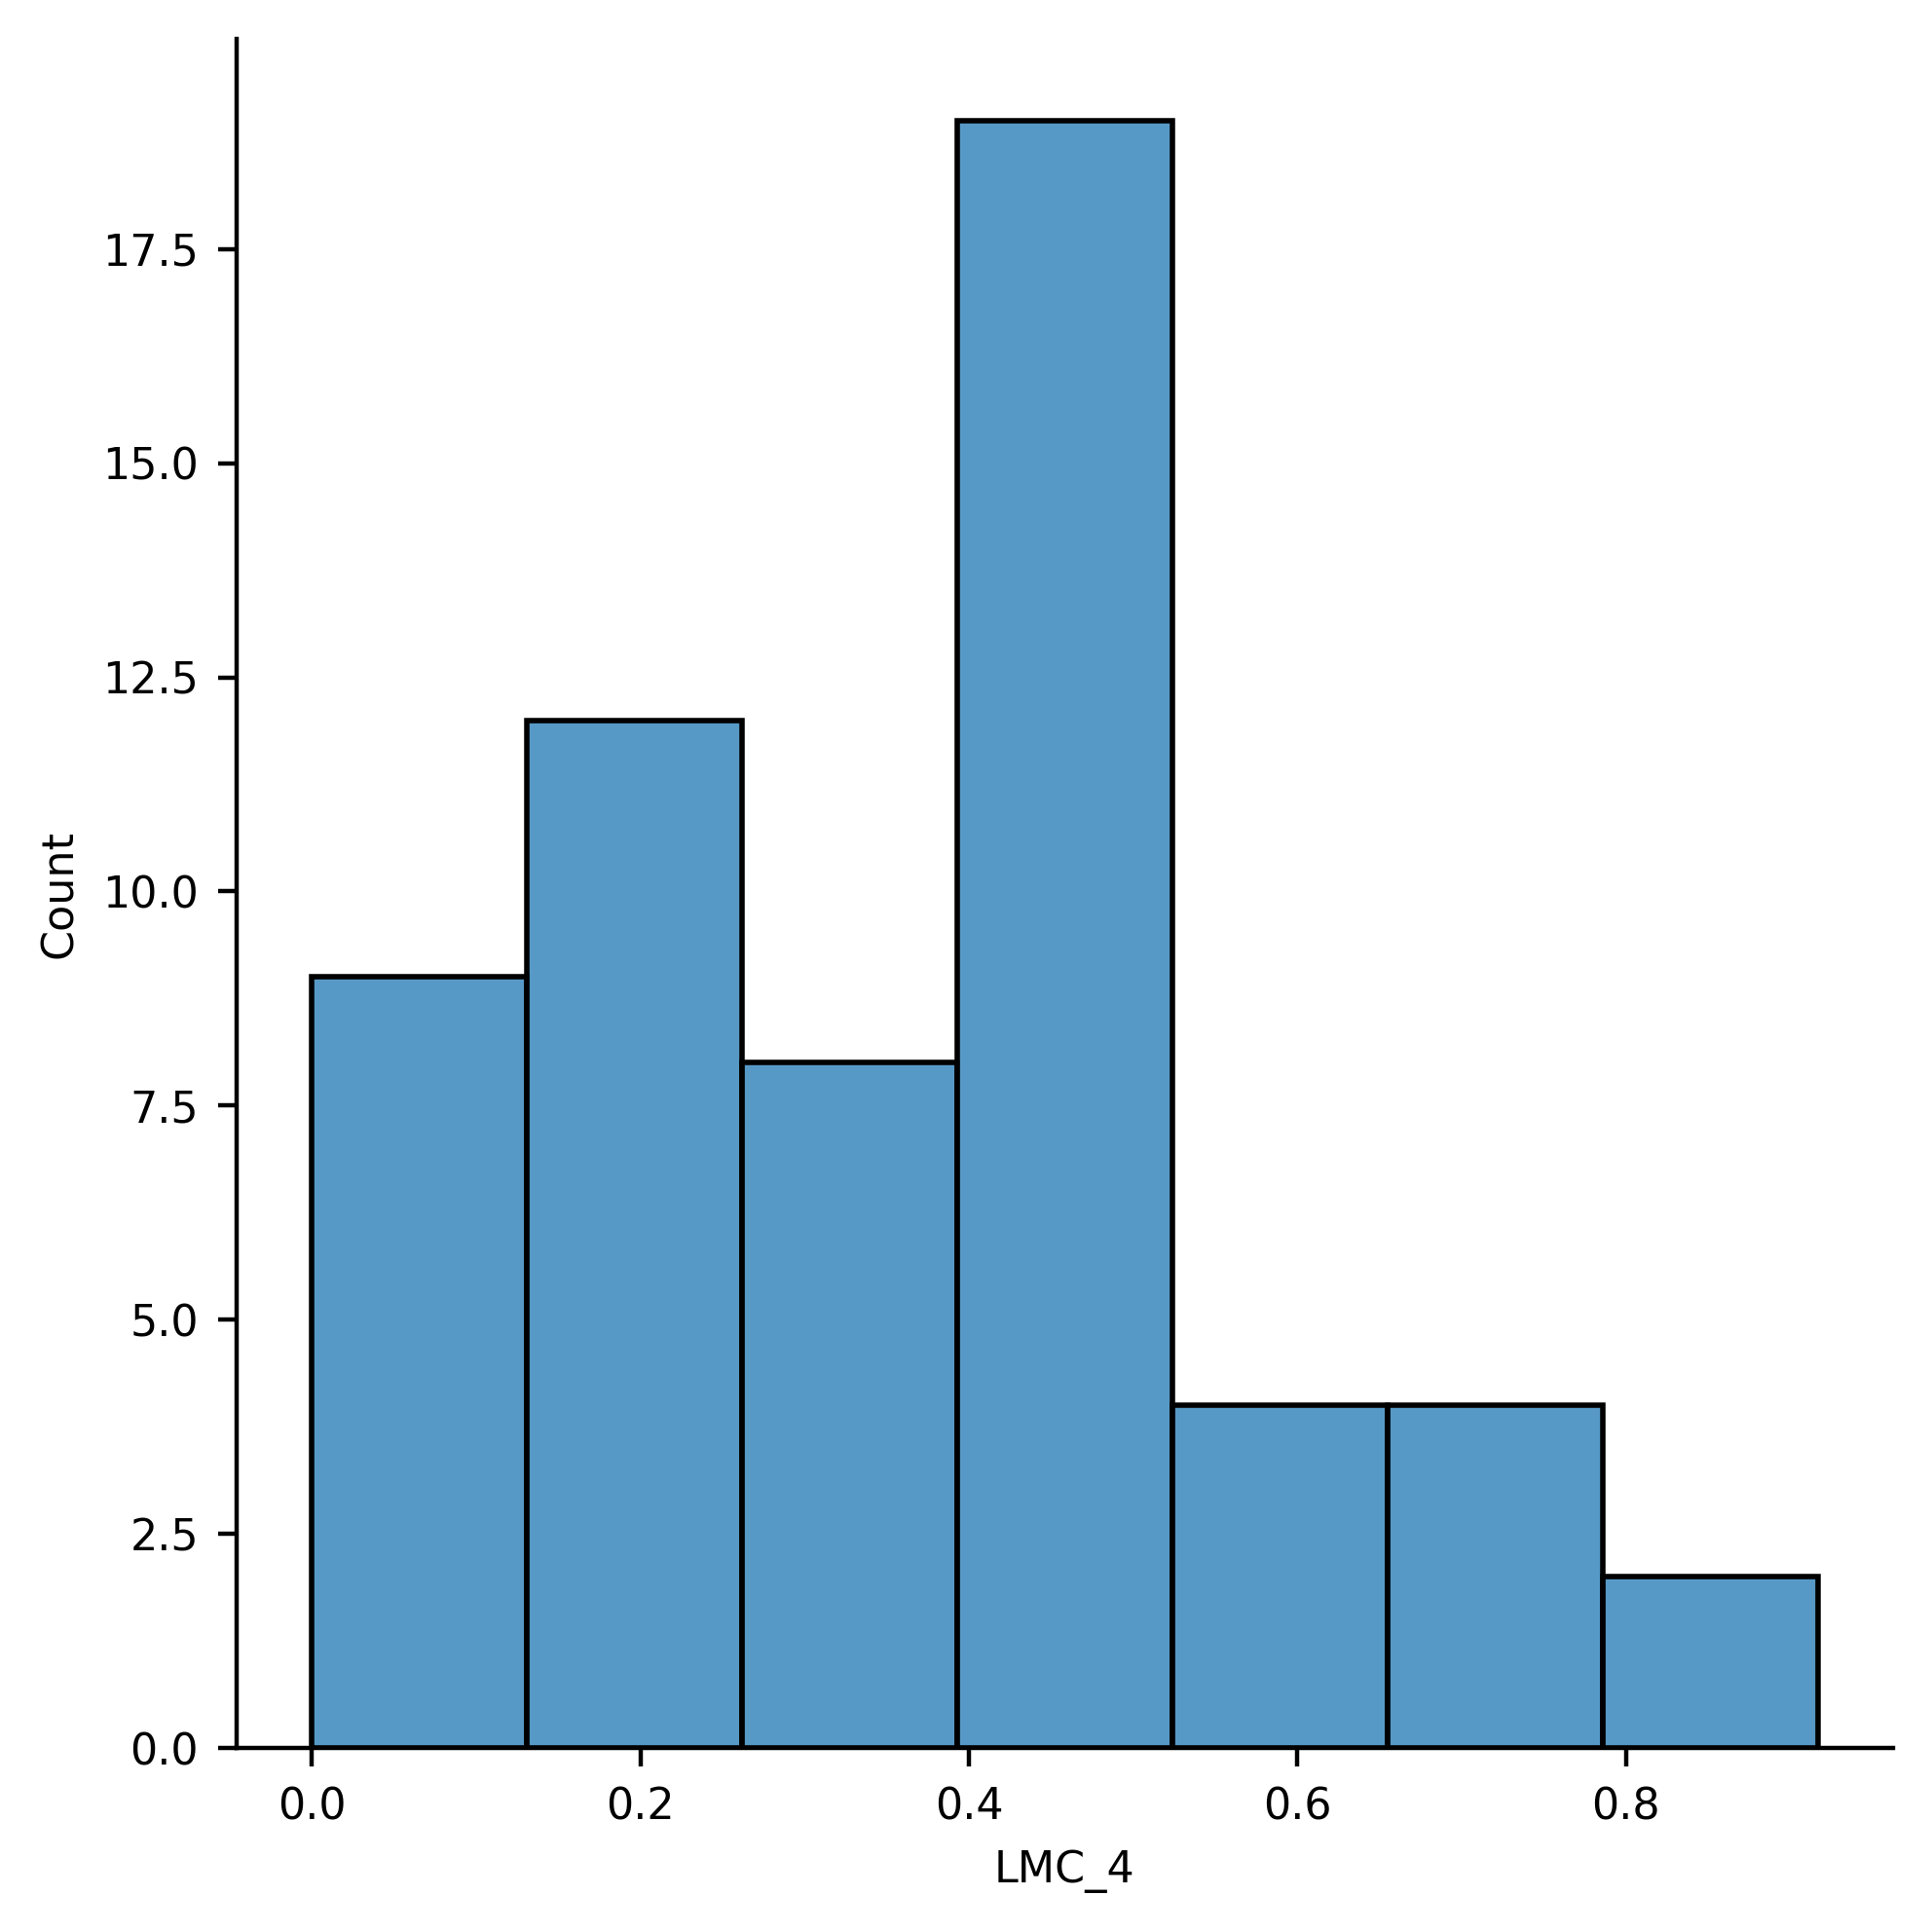

In [47]:
these_pre = ['R1R4', 'R2R5', 'R3R6']
these_post = ['LMC_1', 'LMC_2', 'LMC_3', 'LMC_4']

#fig, axes = plt.subplots(len(these_pre)) 
i = 0

for post_type in these_post:
    for pre_type, rows in percent_multi.groupby('pre_type'):
        if pre_type in these_pre:
            g = sns.displot(data=rows, x=post_type, palette=st_cm)
        #g.set_title(pre_type)
            i += 1
        else:
            continue